In [1]:
#en.openfoodfacts.org.products.csv

# Contents :
**Part 0 : Environment Setup**
 - <a href="#C1">Importation of libraries</a>
 - <a href="#C2">Definition of functions</a>
 - <a href="#C3">Dataset import</a>
 
**Part 1 : Dataset Overview and initial Cleaning**
 - <a href="#C4">Dataset content</a>
 - <a href="#C5">Datest reduced to products sold in France</a> 
 - <a href="#C6">Duplicates</a>
 - <a href="#C7">Dataset relevance</a>
 
**Part 2 : Selecting Variables**
 - <a href="#C8">Completed variables</a>
 - <a href="#C9">Relevant variables</a>
 - <a href="#C10">Non redundant variables</a>
 
**Part 3 : Identifying outliers**
 - <a href="#C11">Impossible values</a>
 - <a href="#C12">Non logical values</a>
 
**Part 4 : Handling missing values**
 - <a href="#C13">Values to 0</a>
 - <a href="#C14">Average values by category</a>
 - <a href="#C15">Computed values with maths</a>
 - <a href="#C16">Imputed values by classification and backward fill</a>

# Part 0 : Environment Setup

# <a name="C1">Importation of libraries</a>

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
# Dispalying versions of libraries
print("pandas version : " + pd.__version__)
print("numpy version : " + np.__version__)
print("matplotlib version : " + mp.__version__)
print("seaborn version : " + sns.__version__)

pandas version : 1.4.2
numpy version : 1.21.5
matplotlib version : 3.5.1
seaborn version : 0.11.2


In [4]:
# Making ajustements
pd.set_option("display.max_columns", 500)
pd.set_option("max_colwidth", 500)
pd.set_option('display.max_rows', 500)

# <a name="C2">Definition of functions</a>

In [5]:
def analyse_data(data):
    '''Function that analyses the dataset - size and NaNs'''

    print("Shape : ", data.shape)
    print("% NaNs : ", data.isna().mean().mean())

In [6]:
def analyse_sect(sect):
    '''Function that analyses the dataset - columns, types and NaNs'''

    print(sect.dtypes)
    print("% NaNs : ", sect.isna().mean().mean())
    # Visualising NaNs
    plt.figure(figsize = (16,8))
    sns.barplot(x=sect.isna().mean().index, y = sect.isna().mean())
    plt.xticks(rotation = 90)
    plt.title('Ratio NaNs per variables in %', fontweight = 'bold', loc = 'left')
    plt.show()

In [7]:
def analyse_qual(list_col):
    '''Function that analyses qualitative columns'''

    data_temp = pd.DataFrame(list_col, columns = ['Variable'])
    for i in range(len(list_col)):
        data_temp.loc[i,'Type'] = data[list_col[i]].dtype
        data_temp.loc[i,'NaN'] = data[list_col[i]].isna().sum()
        data_temp.loc[i,'NaN%'] = data[list_col[i]].isna().mean()
        data_temp.loc[i,'Modalite']=data[list_col[i]].nunique()
    data_temp = data_temp.sort_values(by='NaN')
    data_temp.reset_index(inplace = True,drop=True)
    display(data_temp)
    return data_temp

In [8]:
def analyse_quant(list_col):
    '''Function that analyses quantitative columns'''

    data_temp = pd.DataFrame(list_col, columns = ['Variable'])
    for i in range(len(list_col)):
        data_temp.loc[i,'Type'] = data[list_col[i]].dtype
        data_temp.loc[i,'NaN'] = data[list_col[i]].isna().sum()
        data_temp.loc[i,'NaN%'] = data[list_col[i]].isna().mean()
        data_temp.loc[i,'Min']=data[list_col[i]].min()
        data_temp.loc[i,'Max']=data[list_col[i]].max()
        data_temp.loc[i,'Moy']=data[list_col[i]].mean()
        data_temp.loc[i,'Med']=data[list_col[i]].median()
    data_temp = data_temp.sort_values(by='NaN')
    data_temp.reset_index(inplace = True,drop=True)
    display(data_temp)
    return data_temp

# <a name="C3">Dataset Import</a>

In [9]:
# Importing the file 
data_or = pd.read_csv('en.openfoodfacts.org.products.csv', sep="\t", low_memory=False)

In [10]:
# Copying the file
data = data_or.copy() 

# Part 1 : Dataset Overview and initial Cleaning

# <a name="C4">Dataset content</a>

In [11]:
# Displaying first 2 rows
data.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:origins-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uplo

In [12]:
# Displaying size of file
data.shape

(2054909, 187)

In [13]:
# Displaying columns
print(list(data.columns))

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'abbreviated_product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'packaging_text', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_fr

In [14]:
# Homogeneising format of columns/variables names
data.columns =[column.replace("-", "_") for column in data.columns]

In [15]:
# The file has many variables. Let's analyze it by sections. There are three sections - identifiable and related to the idea of application.

# Section  1 - General information on the product sheet: name, date of modification, etc.
index = pd.Index(data.columns)
i = index.get_loc('packaging') # variable from the beginning of section 2.
SECT1 = data.iloc[:,:i]

# Section 2-Information on the category and ingredients of the product: A set of tags: product category, location, origin, etc. and The ingredients composing the products and their possible additives
j = index.get_loc('energy_kj_100g') #variable from the beginning of section 3.
SECT2 = data.iloc[:,i:j]

# Section 3-Nutritional information of the product: amount in grams of one nutrient per 100 grams of the product.
SECT3 = data.iloc[:,j:]

code                        object
url                         object
creator                     object
created_t                    int64
created_datetime            object
last_modified_t              int64
last_modified_datetime      object
product_name                object
abbreviated_product_name    object
generic_name                object
quantity                    object
dtype: object
% NaNs :  0.2477066115601934


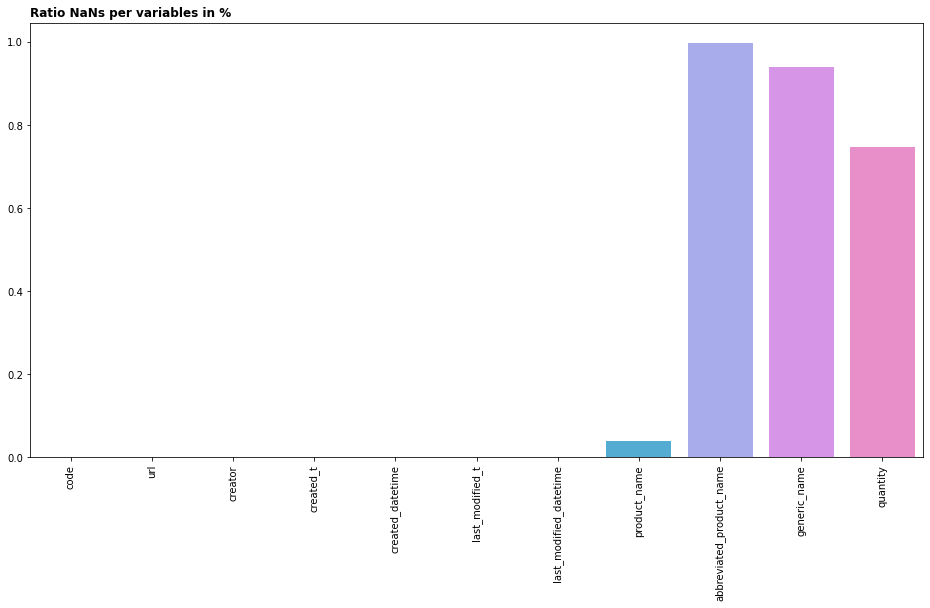

In [16]:
# Displaying columns, types, NaNs for each section - section 1
analyse_sect(SECT1)

In [17]:
# Correcting types for the dates
COL_DATE = data.columns[(data.columns.str.contains('date'))].tolist()
for col in COL_DATE:
    data[col] = pd.to_datetime(data[col])
data[COL_DATE].dtypes

created_datetime          datetime64[ns, UTC]
last_modified_datetime    datetime64[ns, UTC]
dtype: object

packaging                                      object
packaging_tags                                 object
packaging_text                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_en                                  object
origins                                        object
origins_tags                                   object
origins_en                                     object
manufacturing_places                           object
manufacturing_places_tags                      object
labels                                         object
labels_tags                                    object
labels_en                                      object
emb_codes                                      object
emb_codes_tags                                 object
first_packaging_code_geo    

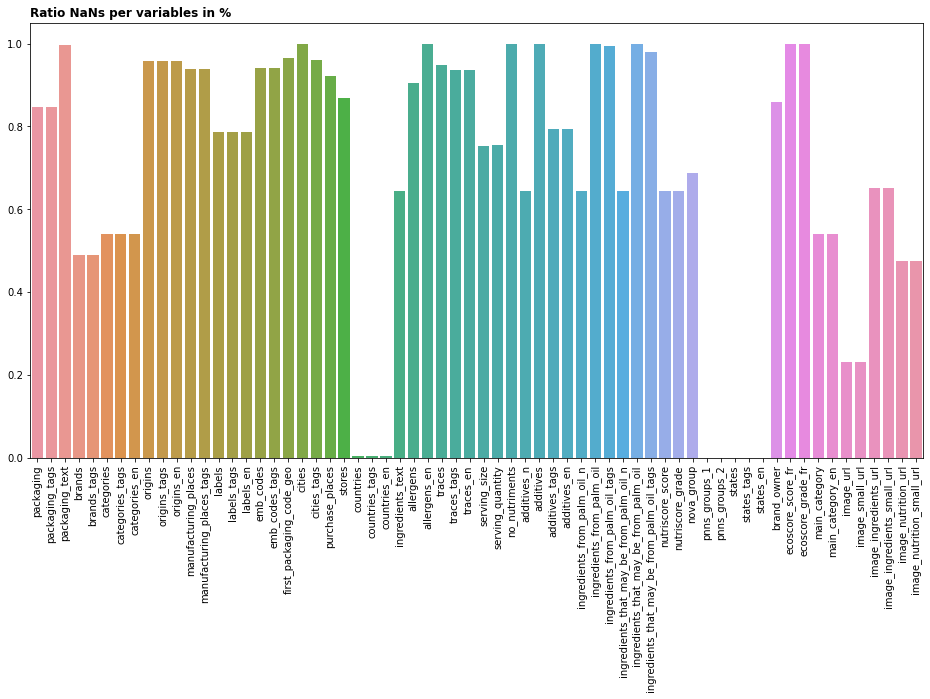

In [18]:
# Displaying columns, types, NaNs for each section - section 2
analyse_sect(SECT2)

energy_kj_100g                                           float64
energy_kcal_100g                                         float64
energy_100g                                              float64
energy_from_fat_100g                                     float64
fat_100g                                                 float64
saturated_fat_100g                                       float64
_butyric_acid_100g                                       float64
_caproic_acid_100g                                       float64
_caprylic_acid_100g                                      float64
_capric_acid_100g                                        float64
_lauric_acid_100g                                        float64
_myristic_acid_100g                                      float64
_palmitic_acid_100g                                      float64
_stearic_acid_100g                                       float64
_arachidic_acid_100g                                     float64
_behenic_acid_100g       

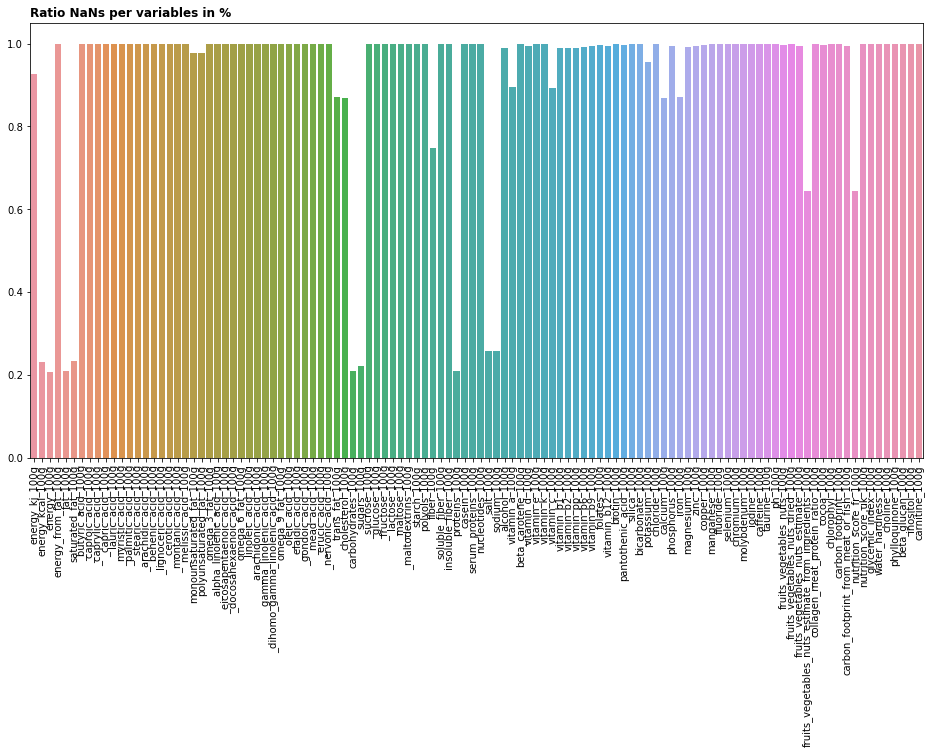

In [19]:
# Displaying columns, types, NaNs for each section - section 3
analyse_sect(SECT3)

# <a name="C5">Datest reduced to products sold in France</a>

In [20]:
# Displaying file characteristics
analyse_data(data)

Shape :  (2054909, 187)
% NaNs :  0.8008768297513876


In [21]:
# Limiting products to those sold in France
data = data[data['countries'].str.contains("FR|Fr")==True]
data.shape

(562417, 187)

In [22]:
# Displaying file characteristics
analyse_data(data)

Shape :  (562417, 187)
% NaNs :  0.7763220752934584


# <a name="C6">Duplicates</a>

In [23]:
# Searching duplicated from key Code
data.duplicated('code').sum()

7

In [24]:
# Displaying duplicates
data.loc[data[['code']].duplicated(keep=False),:]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_kj_100g,energy_kcal_100g,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,_butyric_acid_100g,_caproic_acid_100g,_caprylic_acid_100g,_capric_acid_100g,_lauric_acid_100g,_myristic_acid_100g,_palmitic_acid_100g,_stearic_acid_100g,_arachidic_acid_100g,_behenic_acid_100g,_lignoceric_acid_100g,_cerotic_acid_100g,_montanic_acid_100g,_melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,_alpha_linolenic_acid_100g,_eicosapentaenoic_acid_100g,_docosahexaenoic_acid_100g,omega_6_fat_100g,_linoleic_acid_100g,_arachidonic_acid_100g,_gamma_linolenic_acid_100g,_dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,_oleic_acid_100g,_elaidic_acid_100g,_gondoic_acid_100g,_mead_acid_100g,_erucic_acid_100g,_nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,_sucrose_100g,_glucose_100g,_fructose_100g,_lactose_100g,_maltose_100g,_maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble_fiber_100g,insoluble_fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,fruits_vegetables_nuts_dried_100g,fruits_vegetables_nuts_estimate_100g,fruits_vegetables_nuts_estimate_from_ingredients_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,carbon_footprint_from_meat_or_fish_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g,choline_100g,phylloquinone_100g,beta_glucan_100g,inositol_100g,carnitine_100g
734816,30383354190402,http://world-en.openfoodfacts.org/product/30383354190402/basilic-panzani,openfoodfacts-contributors,1608035756,2020-12-15 12:35:56+00:00,1610702480,2021-01-15 09:21:20+00:00,basilic,NaN,NaN,210 g,verre,verre,NaN,panzani,panzani,"Epicerie,Sauces,Sauces tomate","en:groceries,en:sauces,en:tomato-sauces","Groceries,Sauces,Tomato sauces",NaN,NaN,NaN,NaN,NaN,"Nutriscore,Nutriscore A","en:nutriscore,en:nutriscore-grade-a","Nutriscore,Nutriscore Grade A",NaN,NaN,NaN,NaN,NaN,France,NaN,France,en:france,France,"Pulpe de tomates fraîches avec morceaux et purées de tomates fraîches (85%), légumes frais 7% (oignons, carottes), huile de tournesol, basilic 1,4%, sucre, sel, amidon transformé de maïs, arôme naturel, extrait d'oignon, persil",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,en:e14xx,E14XX - Modifie

In [25]:
# Removing duplicates - older and less completed duplicates
data['NB_NA']=data.isna().sum(axis=1)
data = data.sort_values(by=['NB_NA','last_modified_datetime'],ascending=[False,False])
data=data.drop_duplicates('code',keep='last')
data = data.drop('NB_NA', axis=1)

In [26]:
# Displaying file characteristics
analyse_data(data)

Shape :  (562410, 187)
% NaNs :  0.7763221342984693


# <a name="C7">Dataset relevance</a>

In [27]:
# Analysing PNNS1 categories
data.pnns_groups_1.unique().tolist()

[nan,
 'unknown',
 'Sugary snacks',
 'Alcoholic beverages',
 'Fish Meat Eggs',
 'Beverages',
 'Salty snacks',
 'Fat and sauces',
 'Cereals and potatoes',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products',
 'sugary-snacks']

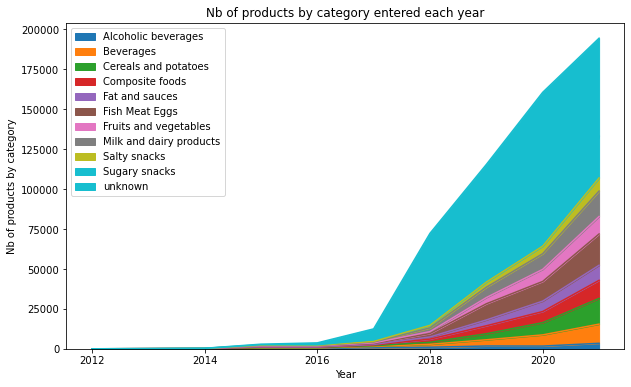

In [28]:
# Visualising how the data got completed over time by PNNS category
data['year'] = data['last_modified_datetime'].dt.year
data['pnns_groups_1'] = np.where(data['pnns_groups_1']=="sugary-snacks", "Sugary snacks", data['pnns_groups_1'])
plot_cat = pd.crosstab(index=data['year'], columns=data['pnns_groups_1'])
plot_cat.plot(kind='area', stacked=True, colormap='tab10', figsize=(10, 6))
plt.legend(loc="upper left", ncol=1)
plt.title('Nb of products by category entered each year', fontsize=12)
plt.xlabel("Year")
plt.ylabel("Nb of products by category")
plt.show()

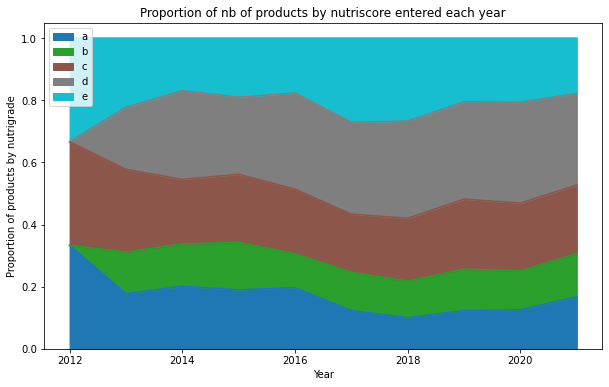

In [29]:
# Visualising how the data got completed over time by nutrigrade (50% of data)
plot_nutri = pd.crosstab(index=data['year'], columns=data['nutriscore_grade'],normalize="index")
plot_nutri.plot(kind='area', stacked=True, colormap='tab10', figsize=(10, 6))
plt.legend(loc="upper left", ncol=1)
plt.title('Proportion of nb of products by nutriscore entered each year', fontsize=12)
plt.xlabel("Year")
plt.ylabel("Proportion of products by nutrigrade")
plt.show()
data = data.drop('year', axis=1)

In [30]:
# Copying file after this first file cleaning and simplification
data_simplifie = data.copy() 
data.to_csv('en.openfoodfacts.org.products_simplifie.csv', index=False)

# Part 2 : Selecting Variables

In [31]:
data = data_simplifie.copy()

# <a name="C8">Completed variables</a>

In [32]:
# Deleting variables with at least one null value
data = data.dropna(axis=1, how='all')

In [33]:
# Displaying file characteristics
analyse_data(data)

Shape :  (562410, 147)
% NaNs :  0.7154574089375084


# <a name="C9">Relevant variables</a>

For the idea we need the following features of the product:
- CODE and NAME of the product
- QUANTITY of the product (unless it is entered manually in grams)
- CATEGORY OF THE PRODUCT (fruit or vegetable or meat or dairy or starchy or other products)
- NUTRISCORE of the product (nutriscore or nutrigrade and associated values - nutritional information)

In [34]:
# Displaying remaining variables
print(list(data.columns))

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'abbreviated_product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'packaging_text', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'additives_n', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_t

In [35]:
# Selecting variables
COL_CODE = ["code"] #unique key of product
COL_NOM =  data.columns[(data.columns.str.contains('name'))].tolist() # list of columns related to the product name
COL_QTE =  data.columns[(data.columns.str.contains('quantity'))|(data.columns.str.contains('size'))].tolist() # list of columns related to the quantity of the product
COL_CAT =  data.columns[(data.columns.str.contains('categor'))|(data.columns.str.contains('pnns'))].tolist() #list of columns related to the product category
COL_NUTRI =  data.columns[(data.columns.str.contains('nutri'))&~(data.columns.str.contains('image'))].tolist() #list of columns related to the nutriscore of the product
COL_NUTRI_100 = data.columns[(data.columns.str.contains('_100g'))&~(data.columns.str.contains('vitamin'or'nutri'))].tolist() #list of columns related to the nutritional values of the product per 100g
COL_VF = data.columns[(data.columns.str.contains('_100g'))&(data.columns.str.contains('fruit'))].tolist() #list of columns related to the fruit values of the product per 100g

index = pd.Index(COL_NUTRI_100)
i = index.get_loc('sodium_100g')
COL_VAL_NUTRI = COL_NUTRI_100[0:i+1] + COL_VF

COL_SELECT = COL_CODE + COL_NOM + COL_QTE + COL_CAT + COL_NUTRI + COL_VAL_NUTRI

In [36]:
# Displaying selected columns
data = data[COL_SELECT]
data.columns

Index(['code', 'product_name', 'abbreviated_product_name', 'generic_name',
       'quantity', 'serving_size', 'serving_quantity', 'categories',
       'categories_tags', 'categories_en', 'pnns_groups_1', 'pnns_groups_2',
       'main_category', 'main_category_en', 'nutriscore_score',
       'nutriscore_grade', 'nutrition_score_fr_100g',
       'nutrition_score_uk_100g', 'energy_kj_100g', 'energy_kcal_100g',
       'energy_100g', 'energy_from_fat_100g', 'fat_100g', 'saturated_fat_100g',
       'monounsaturated_fat_100g', 'polyunsaturated_fat_100g',
       'omega_3_fat_100g', 'omega_6_fat_100g', 'omega_9_fat_100g',
       'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
       'soluble_fiber_100g', 'insoluble_fiber_100g', 'proteins_100g',
       'casein_100g', 'serum_proteins_100g', 'nucleotides_100g', 'salt_100g',
       'sodium_100g', 'fruits_vegetables_nuts_100g',
       'fruits_vegetables_nuts_dried_100g',


In [37]:
# Displaying file characteristics
analyse_data(data)

Shape :  (562410, 48)
% NaNs :  0.6359379722977899


# <a name="C10">Non redundant variables</a>

### 1 - Variables liées au nom du produit

In [38]:
# Listing name-related variables
COL_NOM

['product_name', 'abbreviated_product_name', 'generic_name']

In [39]:
# Analysing names columns
data_nom = analyse_qual(COL_NOM)
comp_nom = data[COL_NOM].notna().groupby(COL_NOM)
display(comp_nom.size())

,Variable,Type,NaN,NaN%,Modalite
0,product_name,object,20776.0,0.036941,388963.0
1,generic_name,object,481952.0,0.856941,57394.0
2,abbreviated_product_name,object,555868.0,0.988368,6435.0


product_name  abbreviated_product_name  generic_name
False         False                     False            20336
                                        True                87
              True                      False              309
                                        True                44
True          False                     False           460725
                                        True             74720
              True                      False              582
                                        True              5607
dtype: int64

In [40]:
# Aggregating names columns and filling main column (most completed one)
variable_princ_nom = data_nom.loc[0,'Variable']
for i in range(1,data_nom.shape[0]):
    data.loc[data[variable_princ_nom].isna(),variable_princ_nom]  = data.loc[data[variable_princ_nom].isna(),data_nom.loc[i,'Variable']]
print('Main variable is : ',variable_princ_nom)

Main variable is :  product_name


In [41]:
# Verifying the aggregation
data_nom = analyse_qual(COL_NOM)
comp_nom = data[COL_NOM].notna().groupby(COL_NOM)
display(comp_nom.size())

,Variable,Type,NaN,NaN%,Modalite
0,product_name,object,20336.0,0.036159,389373.0
1,generic_name,object,481952.0,0.856941,57394.0
2,abbreviated_product_name,object,555868.0,0.988368,6435.0


product_name  abbreviated_product_name  generic_name
False         False                     False            20336
True          False                     False           460725
                                        True             74807
              True                      False              891
                                        True              5651
dtype: int64

In [42]:
# Deleting redundant variables no longer needed
COL_NOM.remove(variable_princ_nom)
data = data.drop(COL_NOM, axis=1)

### 2 - Variables related to the quantity of the product

In [43]:
# Listing variables related to the quantity of the product
COL_QTE

['quantity', 'serving_size', 'serving_quantity']

In [44]:
# Analysing these columns
comp_qte = data[COL_QTE].notna().groupby(COL_QTE)
display(comp_qte.size())
data_qte = analyse_qual(COL_QTE)

quantity  serving_size  serving_quantity
False     False         False               302459
                        True                    19
          True          False                 2152
                        True                  6340
True      False         False               173986
                        True                    86
          True          False                 2760
                        True                 74608
dtype: int64

,Variable,Type,NaN,NaN%,Modalite
0,quantity,object,310970.0,0.552924,22729.0
1,serving_size,object,476550.0,0.847336,9318.0
2,serving_quantity,float64,481357.0,0.855883,1392.0


In [45]:
# Too many information missing for variables QTE that cannot be deducted from others. Instead, for the application of the idea, it will be necessary to fill in the quantity of products in g or equivalent (ml).
# Deleting quantity-related variables
data = data.drop(COL_QTE, axis=1)

### 3 - Variables related to the product category

# Eliminating redundant variables - variables related to product catgeorie

In [46]:
# Listing variables related to the category
COL_CAT

['categories',
 'categories_tags',
 'categories_en',
 'pnns_groups_1',
 'pnns_groups_2',
 'main_category',
 'main_category_en']

In [47]:
# Analysing these columns
comp_cat = data[COL_CAT].notna().groupby(COL_CAT)
display(comp_cat.size())
data_cat = analyse_qual(COL_CAT)

categories  categories_tags  categories_en  pnns_groups_1  pnns_groups_2  main_category  main_category_en
False       False            False          False          False          False          False                   14
                                            True           True           False          False               222632
True        False            False          True           True           False          False                    2
            True             True           False          True           True           True                     1
                                            True           True           True           True                339761
dtype: int64

,Variable,Type,NaN,NaN%,Modalite
0,pnns_groups_2,object,14.0,0.000025,42.0
1,pnns_groups_1,object,15.0,0.000027,11.0
2,categories,object,222646.0,0.395878,62080.0
3,categories_tags,object,222648.0,0.395882,45826.0
4,categories_en,object,222648.0,0.395882,45823.0
5,main_category,object,222648.0,0.395882,18551.0
6,main_category_en,object,222648.0,0.395882,18550.0


In [48]:
# Visualising variable pnns_groups_1, best completed one with 12 values
print('Modalities PNNS 1')
display(data.pnns_groups_1.unique().tolist())

Modalities PNNS 1


[nan,
 'unknown',
 'Sugary snacks',
 'Alcoholic beverages',
 'Fish Meat Eggs',
 'Beverages',
 'Salty snacks',
 'Fat and sauces',
 'Cereals and potatoes',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products']

Distribution of PNNS 1


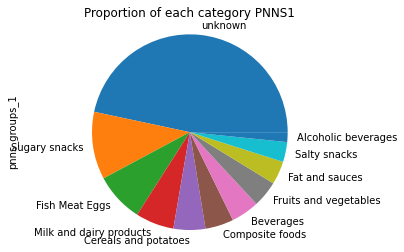

In [49]:
# Visualising distribution of variable pnns_groups_1 
print('Distribution of PNNS 1')
data['pnns_groups_1'].value_counts(normalize=True).plot(kind='pie')
plt.title('Proportion of each category PNNS1', fontsize=12)
plt.axis('equal') 
plt.show()

In [50]:
# The pnns1 category is not enough for us for the categorization necessary for the application of the idea.
# Dsiplaying pnns_groups_2 having more modalities
print('Modalities PNNS 2')
display(data.pnns_groups_2.unique().tolist())

Modalities PNNS 2


[nan,
 'unknown',
 'Sweets',
 'Alcoholic beverages',
 'Biscuits and cakes',
 'Processed meat',
 'Fruit juices',
 'Appetizers',
 'Fats',
 'Nuts',
 'Breakfast cereals',
 'Bread',
 'Pizza pies and quiches',
 'Cereals',
 'Fruits',
 'Pizza pies and quiche',
 'Cheese',
 'Fruit nectars',
 'One-dish meals',
 'Dried fruits',
 'Pastries',
 'Salty and fatty products',
 'Meat',
 'Vegetables',
 'Fish and seafood',
 'Sweetened beverages',
 'Soups',
 'Ice cream',
 'Sandwiches',
 'Teas and herbal teas and coffees',
 'Milk and yogurt',
 'Eggs',
 'Legumes',
 'Dairy desserts',
 'Dressings and sauces',
 'Chocolate products',
 'Offals',
 'Potatoes',
 'Waters and flavored waters',
 'Artificially sweetened beverages',
 'Plant-based milk substitutes',
 'pastries',
 'Unsweetened beverages']

Distribution of PNNS 2


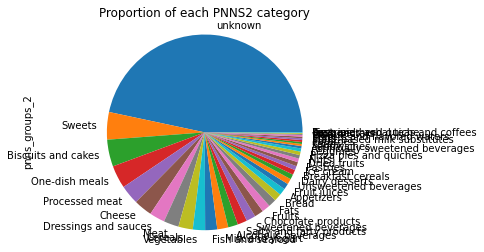

In [51]:
# Visualising distribution of variable pnns_groups_2 
print('Distribution of PNNS 2')
data['pnns_groups_2'].value_counts(normalize=True).plot(kind='pie')
plt.title('Proportion of each PNNS2 category', fontsize=12)
plt.axis('equal') 
plt.show()

In [52]:
# Checking the "unknown" values of PNNS1 to see if they can be more explicit considering the values of the other categories.
data_temp = data.copy()
data_temp['pnns_groups_1'] = np.where(data_temp['pnns_groups_1']=="unknown", np.nan, data_temp['pnns_groups_1'])
# Comparing the filling of categories columns - only categories
COL_CAT2 = ['pnns_groups_1', 'categories', 'main_category']
comparaison = data_temp[COL_CAT2].notna().groupby(COL_CAT2)
display(comparaison.size())

pnns_groups_1  categories  main_category
False          False       False            222646
               True        False                 2
                           True              39766
True           True        True             299996
dtype: int64

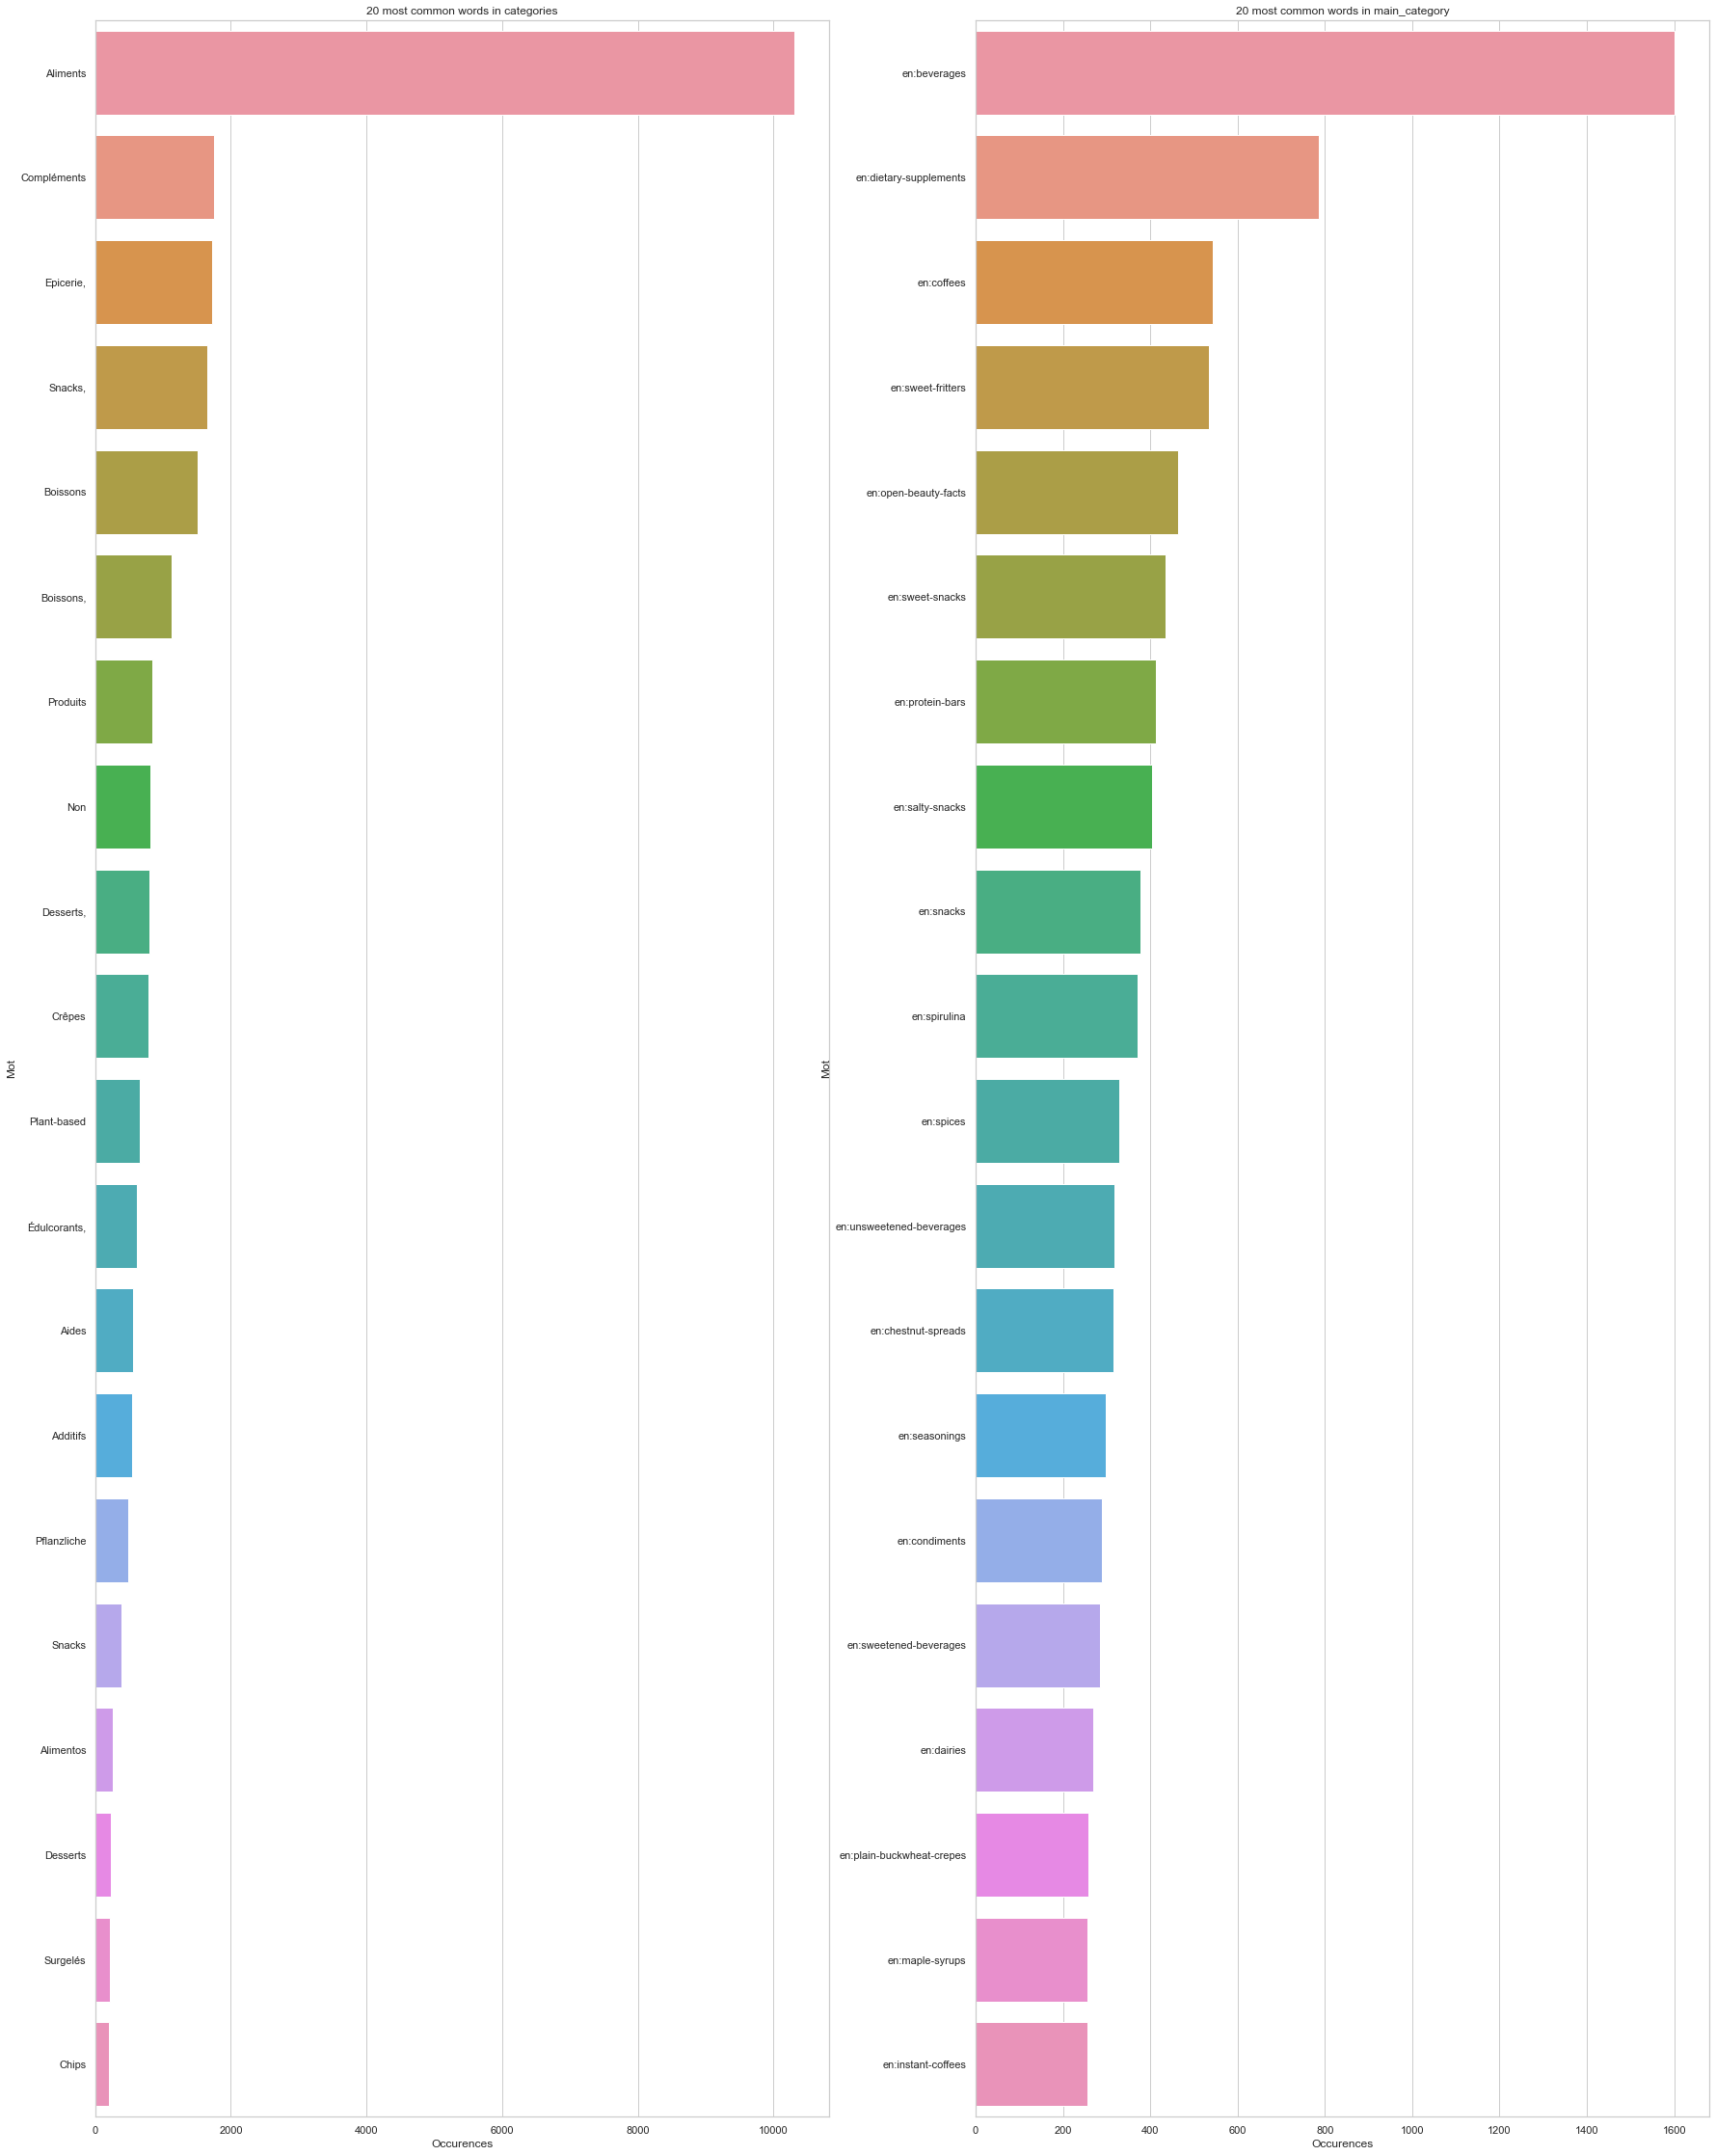

In [53]:
# Checking the 20 most common words of NaNs between categories
import collections
mots_pops = []
i = 1
ind2 = comparaison.get_group((False, True, True)).index
COL= ['categories', 'main_category']
data_short = data.loc[ind2]

for column in COL :
    liste_mots = [str(i).split(' ', 1)[0] for i in data_short[column].dropna().tolist()]
    mots_pops.append(collections.Counter(liste_mots).most_common(20))

sns.set(font_scale=2.5)

plt.figure(figsize=(30, 40))

for nom_colonne, liste_mots in zip(COL[0:], mots_pops[0:]):
    sns.set(style="whitegrid")
    plt.subplot(1, 2, i)
    mots_utilises = pd.DataFrame(liste_mots, columns = ['Mot', 'Occurences']).sort_values(by='Occurences', ascending=False)
    mots_utilises.head()
    sns.barplot(y = 'Mot', x='Occurences', data = mots_utilises)
    plt.title('20 most common words in ' + nom_colonne, size=12)
    i = i+1

plt.show()

sns.set(font_scale=1)

In [54]:
# From the previous analysis, it is irrelevant to complete the PNNS1 considering the other categories knowing that the key words belong to modalities of PNNS1 that are not very relevant to our idea.
# Créeating an intermediate PNNS12 column - which corresponds to the PNNS1 variable modified to include only the categories relevant to the idea. 
variable_princ_cat = "pnns_groups_12"
data[variable_princ_cat]  = np.where(data['pnns_groups_1'] == "Fruits and vegetables", data['pnns_groups_2'], data['pnns_groups_1'])
COL_OTHER = ['unknown','Sugary snacks','Alcoholic beverages','Beverages','Salty snacks','Fat and sauces','Composite foods']
for col in COL_OTHER:
    data["pnns_groups_12"] = data["pnns_groups_12"].replace([col],'Other')
data["pnns_groups_12"] = data["pnns_groups_12"].replace('Dried fruits','Fruits')
data["pnns_groups_12"] = data["pnns_groups_12"].replace('Soups','Vegetables')
data["pnns_groups_12"].fillna("Other", inplace=True)

In [55]:
# Displaying columns of new variable pnns12
data.pnns_groups_12.unique().tolist()

['Other',
 'Fish Meat Eggs',
 'Cereals and potatoes',
 'Fruits',
 'Milk and dairy products',
 'Vegetables']

Distribution of PNNS 12


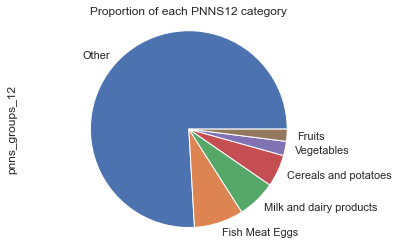

In [56]:
# Visualising distribution of variable pnns_groups_12 
print('Distribution of PNNS 12')
data[variable_princ_cat].value_counts(normalize=True).plot(kind='pie')
plt.title('Proportion of each PNNS12 category', fontsize=12)
plt.axis('equal') 
plt.show()

In [57]:
# Verifying the aggregation
COL_CAT.append(variable_princ_cat)
comp_cat = data[COL_CAT].notna().groupby(COL_CAT)
display(comp_cat.size())
data_cat = analyse_qual(COL_CAT)

categories  categories_tags  categories_en  pnns_groups_1  pnns_groups_2  main_category  main_category_en  pnns_groups_12
False       False            False          False          False          False          False             True                  14
                                            True           True           False          False             True              222632
True        False            False          True           True           False          False             True                   2
            True             True           False          True           True           True              True                   1
                                            True           True           True           True              True              339761
dtype: int64

,Variable,Type,NaN,NaN%,Modalite
0,pnns_groups_12,object,0.0,0.000000,6.0
1,pnns_groups_2,object,14.0,0.000025,42.0
2,pnns_groups_1,object,15.0,0.000027,11.0
3,categories,object,222646.0,0.395878,62080.0
4,categories_tags,object,222648.0,0.395882,45826.0
5,categories_en,object,222648.0,0.395882,45823.0
6,main_category,object,222648.0,0.395882,18551.0
7,main_category_en,object,222648.0,0.395882,18550.0


In [58]:
# Deleting redundant and useless variables
COL_CAT = [i for i in COL_CAT if i not in {variable_princ_cat,"pnns_groups_1"}]
data = data.drop(COL_CAT, axis=1)

### 4 - Variables related to the nutriscore of the product

In [59]:
# Listing Variables related to the nutriscore of the product
COL_NUTRI

['nutriscore_score',
 'nutriscore_grade',
 'nutrition_score_fr_100g',
 'nutrition_score_uk_100g']

In [60]:
# Analysing these columns
data[COL_NUTRI].describe()

,nutriscore_score,nutrition_score_fr_100g,nutrition_score_uk_100g
count,269454.000000,269457.000000,3.000000
mean,9.311014,9.311122,19.000000
std,8.821862,8.821883,5.196152
min,-15.000000,-15.000000,13.000000
25%,2.000000,2.000000,17.500000
50%,10.000000,10.000000,22.000000
75%,16.000000,16.000000,22.000000
max,40.000000,40.000000,22.000000


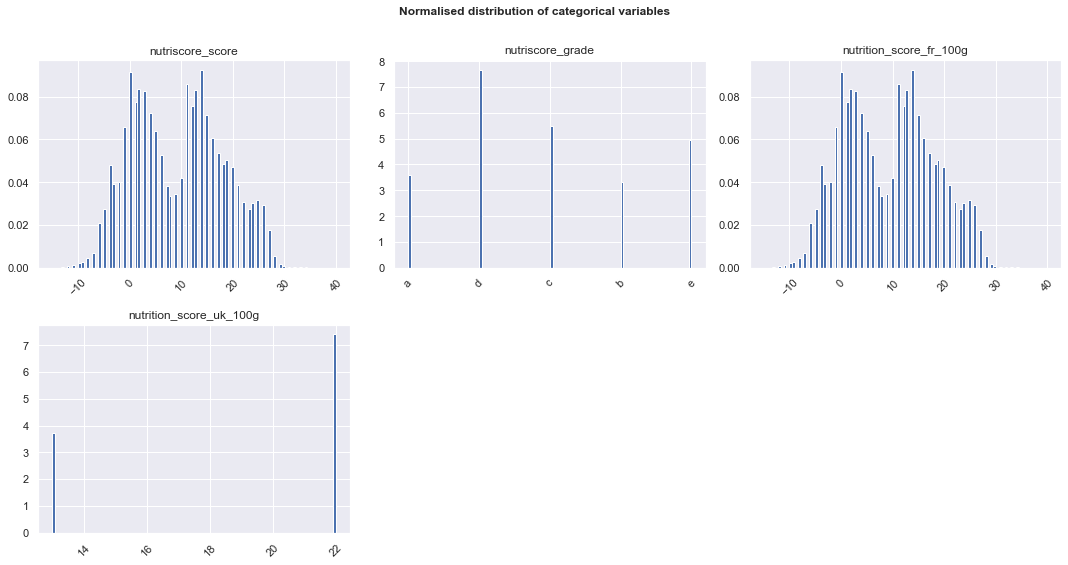

In [61]:
# Comparing these columns
fig = plt.figure(figsize=(15,12))

for i, col in enumerate(COL_NUTRI,1):
    ax = fig.add_subplot(3,3,i)
    ax.set_title(col)
    data[col].hist(density=True, bins=100)
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle('Normalised distribution of categorical variables', fontsize=12,
             fontweight='bold')

plt.show()

In [62]:
# Considering the most completed variable as the graphs are equivalent for the 2 nutriscore columns
variable_princ_nutri = "nutrition_score_fr_100g"

In [63]:
# Removing redundant variables that are not useful
COL_NUTRI = [i for i in COL_NUTRI if i not in {variable_princ_nutri,'nutriscore_grade'}]
data = data.drop(COL_NUTRI, axis=1)

### 5 - Variables related to the energy value of the product

In [64]:
# Listing variables related to nutritional values
COL_VAL_NUTRI

['energy_kj_100g',
 'energy_kcal_100g',
 'energy_100g',
 'energy_from_fat_100g',
 'fat_100g',
 'saturated_fat_100g',
 'monounsaturated_fat_100g',
 'polyunsaturated_fat_100g',
 'omega_3_fat_100g',
 'omega_6_fat_100g',
 'omega_9_fat_100g',
 'trans_fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 'soluble_fiber_100g',
 'insoluble_fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum_proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'fruits_vegetables_nuts_100g',
 'fruits_vegetables_nuts_dried_100g',
 'fruits_vegetables_nuts_estimate_100g',
 'fruits_vegetables_nuts_estimate_from_ingredients_100g']

In [65]:
# Listing redundant variables of COL_100

# Energy variables
COL_ENER = data.columns[(data.columns.str.contains('100g'))&(data.columns.str.contains('energy'))].tolist()

# Fruit-veg variables
COL_FRUIT_VEG = data.columns[(data.columns.str.contains('_100g'))&(data.columns.str.contains('fruit'))].tolist()

In [66]:
# Listing variables linked to Energy
COL_ENER

['energy_kj_100g', 'energy_kcal_100g', 'energy_100g', 'energy_from_fat_100g']

In [67]:
# Analysing these columns
data_ener = analyse_quant(COL_ENER)
comp_ener = data[COL_ENER].notna().groupby(COL_ENER)
display(comp_ener.size())

,Variable,Type,NaN,NaN%,Min,Max,Moy,Med
0,energy_100g,float64,102233.0,0.181777,0.0,8010000.0,1166.964649,1088.0
1,energy_kcal_100g,float64,127456.0,0.226625,0.0,1360000.0,279.052062,263.0
2,energy_kj_100g,float64,481933.0,0.856907,0.0,8010000.0,1202.925640,987.0
3,energy_from_fat_100g,float64,562293.0,0.999792,0.0,3740.0,446.957265,188.0


energy_kj_100g  energy_kcal_100g  energy_100g  energy_from_fat_100g
False           False             False        False                   102233
                                  True         False                      122
                True              True         False                   379463
                                               True                       115
True            False             True         False                    25099
                                               True                         2
                True              True         False                    55376
dtype: int64

In [68]:
# Creating a column energy_kcalenkj that is the kj value equivalent to kcal in variable kcal
data['energy_kcalenkj_100g'] = data['energy_kcal_100g']*4.186
COL_ENER.remove('energy_kcal_100g')
COL_ENER.append('energy_kcalenkj_100g')

In [69]:
# Analysing order of magnitude of these variables
display(data[COL_ENER].describe())
data_ener = analyse_quant(COL_ENER)

,energy_kj_100g,energy_100g,energy_from_fat_100g,energy_kcalenkj_100g
count,8.047700e+04,4.601770e+05,117.000000,4.349540e+05
mean,1.202926e+03,1.166965e+03,446.957265,1.168112e+03
std,2.850429e+04,1.194598e+04,732.920109,8.673243e+03
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4.310000e+02,4.560000e+02,21.000000,4.604600e+02
50%,9.870000e+02,1.088000e+03,188.000000,1.100918e+03
75%,1.620000e+03,1.674000e+03,523.000000,1.674400e+03
max,8.010000e+06,8.010000e+06,3740.000000,5.692960e+06


,Variable,Type,NaN,NaN%,Min,Max,Moy,Med
0,energy_100g,float64,102233.0,0.181777,0.0,8010000.0,1166.964649,1088.000
1,energy_kcalenkj_100g,float64,127456.0,0.226625,0.0,5692960.0,1168.111930,1100.918
2,energy_kj_100g,float64,481933.0,0.856907,0.0,8010000.0,1202.925640,987.000
3,energy_from_fat_100g,float64,562293.0,0.999792,0.0,3740.0,446.957265,188.000


[(0.0, 4000.0)]

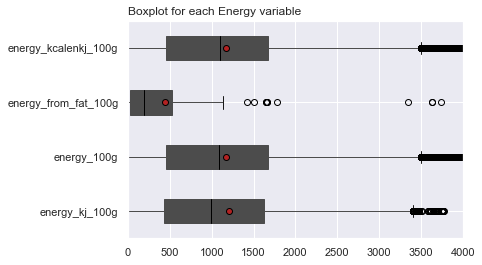

In [70]:
# Visualising order of magnitude of these variables - zoom
plt.title(label= 'Boxplot for each Energy variable', loc = 'left', fontsize=12)
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
data[COL_ENER].boxplot(showfliers=True, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.gca().set(xlim=(0,4000))

In [71]:
# Aggregating column taking max value of redundant variables
variable_princ_ener = data_ener.loc[0,'Variable']
data[variable_princ_ener]  = data[COL_ENER].max(skipna=True, axis=1)
print('Main variable is : ',variable_princ_ener)

Main variable is :  energy_100g


In [72]:
# Verifying the aggregation
data_ener = analyse_quant(COL_ENER)
comp_ener = data[COL_ENER].notna().groupby(COL_ENER)
display(comp_ener.size())

,Variable,Type,NaN,NaN%,Min,Max,Moy,Med
0,energy_100g,float64,102233.0,0.181777,0.0,8010000.0,1170.366975,1092.546
1,energy_kcalenkj_100g,float64,127456.0,0.226625,0.0,5692960.0,1168.111930,1100.918
2,energy_kj_100g,float64,481933.0,0.856907,0.0,8010000.0,1202.925640,987.000
3,energy_from_fat_100g,float64,562293.0,0.999792,0.0,3740.0,446.957265,188.000


energy_kj_100g  energy_100g  energy_from_fat_100g  energy_kcalenkj_100g
False           False        False                 False                   102233
                True         False                 False                      122
                                                   True                    379463
                             True                  True                       115
True            True         False                 False                    25099
                                                   True                     55376
                             True                  False                        2
dtype: int64

In [73]:
# Deleting variables no longer usefull
COL_ENER.remove(variable_princ_ener)
COL_ENER.append('energy_kcal_100g')
data = data.drop(COL_ENER, axis=1)

### 6 - Variables related to the fruit-veg value of the product

In [74]:
# Listing variables related to the fruit-veg value of the product 
COL_FRUIT_VEG

['fruits_vegetables_nuts_100g',
 'fruits_vegetables_nuts_dried_100g',
 'fruits_vegetables_nuts_estimate_100g',
 'fruits_vegetables_nuts_estimate_from_ingredients_100g']

In [75]:
# Analysing these columns
data_fv = analyse_quant(COL_FRUIT_VEG)
comp_fv = data[COL_FRUIT_VEG].notna().groupby(COL_FRUIT_VEG)
display(comp_fv.size())

,Variable,Type,NaN,NaN%,Min,Max,Moy,Med
0,fruits_vegetables_nuts_estimate_from_ingredients_100g,float64,313434.0,0.557305,0.0,13454.0,12.197749,0.0
1,fruits_vegetables_nuts_estimate_100g,float64,551878.0,0.981273,0.0,100.0,46.295670,50.0
2,fruits_vegetables_nuts_100g,float64,555941.0,0.988498,0.0,100.0,37.995841,28.0
3,fruits_vegetables_nuts_dried_100g,float64,561828.0,0.998965,0.0,100.0,9.584313,0.0


fruits_vegetables_nuts_100g  fruits_vegetables_nuts_dried_100g  fruits_vegetables_nuts_estimate_100g  fruits_vegetables_nuts_estimate_from_ingredients_100g
False                        False                              False                                 False                                                    311518
                                                                                                      True                                                     233968
                                                                True                                  False                                                      1636
                                                                                                      True                                                       8697
                             True                               False                                 False                                                         4
              

In [76]:
# Aggregating the columns
variable_princ_fv = data_fv.loc[0,'Variable']
data[variable_princ_fv]  = data[COL_FRUIT_VEG].max(skipna=True, axis=1)
print('Variable principale est : ',variable_princ_fv)

Variable principale est :  fruits_vegetables_nuts_estimate_from_ingredients_100g


In [77]:
# Checking the aggregation
data_fv = analyse_quant(COL_FRUIT_VEG)
comp_fv = data[COL_FRUIT_VEG].notna().groupby(COL_FRUIT_VEG)
display(comp_fv.size())

,Variable,Type,NaN,NaN%,Min,Max,Moy,Med
0,fruits_vegetables_nuts_estimate_from_ingredients_100g,float64,311518.0,0.553898,0.0,13454.0,13.275588,0.0
1,fruits_vegetables_nuts_estimate_100g,float64,551878.0,0.981273,0.0,100.0,46.295670,50.0
2,fruits_vegetables_nuts_100g,float64,555941.0,0.988498,0.0,100.0,37.995841,28.0
3,fruits_vegetables_nuts_dried_100g,float64,561828.0,0.998965,0.0,100.0,9.584313,0.0


fruits_vegetables_nuts_100g  fruits_vegetables_nuts_dried_100g  fruits_vegetables_nuts_estimate_100g  fruits_vegetables_nuts_estimate_from_ingredients_100g
False                        False                              False                                 False                                                    311518
                                                                                                      True                                                     233968
                                                                True                                  True                                                      10333
                             True                               False                                 True                                                        120
                                                                True                                  True                                                          2
True          

In [78]:
# Deleting variables redundant and no longer useful
COL_FRUIT_VEG.remove(variable_princ_fv)
data = data.drop(COL_FRUIT_VEG, axis=1)

In [79]:
# Displaying file characteristics
analyse_data(data)

Shape :  (562410, 30)
% NaNs :  0.5955667573478426


In [80]:
# Listing remaining columns
print(list(data.columns))

['code', 'product_name', 'pnns_groups_1', 'nutriscore_grade', 'nutrition_score_fr_100g', 'energy_100g', 'fat_100g', 'saturated_fat_100g', 'monounsaturated_fat_100g', 'polyunsaturated_fat_100g', 'omega_3_fat_100g', 'omega_6_fat_100g', 'omega_9_fat_100g', 'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'soluble_fiber_100g', 'insoluble_fiber_100g', 'proteins_100g', 'casein_100g', 'serum_proteins_100g', 'nucleotides_100g', 'salt_100g', 'sodium_100g', 'fruits_vegetables_nuts_estimate_from_ingredients_100g', 'pnns_groups_12']


In [81]:
# Renaming some columns
data.rename(columns={'nutrition_score_fr_100g': 'nutrition_score'}, inplace=True)
variable_princ_nutri = 'nutrition_score'
data.rename(columns={'fruits_vegetables_nuts_estimate_from_ingredients_100g': 'fruits_vegetables_nuts_100g'}, inplace=True)

In [82]:
# Displaying selected variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562410 entries, 1258546 to 768928
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         562410 non-null  object 
 1   product_name                 542074 non-null  object 
 2   pnns_groups_1                562395 non-null  object 
 3   nutriscore_grade             269454 non-null  object 
 4   nutrition_score              269457 non-null  float64
 5   energy_100g                  460177 non-null  float64
 6   fat_100g                     457355 non-null  float64
 7   saturated_fat_100g           457415 non-null  float64
 8   monounsaturated_fat_100g     3045 non-null    float64
 9   polyunsaturated_fat_100g     3066 non-null    float64
 10  omega_3_fat_100g             1390 non-null    float64
 11  omega_6_fat_100g             302 non-null     float64
 12  omega_9_fat_100g             54 non-null      float6

In [83]:
# Copying the file after this cleanign step of Part 2
data_nettoye1 = data.copy() 
data.to_csv('en.openfoodfacts.org.products_nettoye1.csv', index=False)

# Part 3 : Identifying outliers

In [84]:
data = data_nettoye1.copy()

# <a name="C11">Impossible values</a>

### 1 - Qualitative variables

In [85]:
# Identifying qualitative variables
COL_QUAL = data.select_dtypes(include = ['object']).columns
COL_QUAL

Index(['code', 'product_name', 'pnns_groups_1', 'nutriscore_grade',
       'pnns_groups_12'],
      dtype='object')

In [86]:
# Analysing these columns
analyse_qual(COL_QUAL)

,Variable,Type,NaN,NaN%,Modalite
0,code,object,0.0,0.000000,562410.0
1,pnns_groups_12,object,0.0,0.000000,6.0
2,pnns_groups_1,object,15.0,0.000027,11.0
3,product_name,object,20336.0,0.036159,389373.0
4,nutriscore_grade,object,292956.0,0.520894,5.0


,Variable,Type,NaN,NaN%,Modalite
0,code,object,0.0,0.000000,562410.0
1,pnns_groups_12,object,0.0,0.000000,6.0
2,pnns_groups_1,object,15.0,0.000027,11.0
3,product_name,object,20336.0,0.036159,389373.0
4,nutriscore_grade,object,292956.0,0.520894,5.0


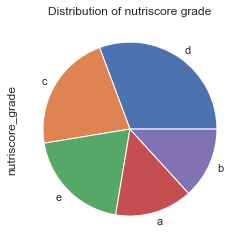

In [87]:
# Visualising nutriscoregrade modalities. Among these variables above, only the nutriscore grade has clearly defined values
data['nutriscore_grade'].value_counts(normalize=True).plot(kind='pie')
plt.title('Distribution of nutriscore grade', fontsize=12)
plt.show()

In [88]:
# Ensuring nutriscore grade only takes the following 5 values - a, b, c, d ou e.
NUTRI_VAL = ['a', 'b', 'c', 'd', 'e']
data['nutriscore_grade']= data['nutriscore_grade'].str.lower()
data['nutriscore_grade'] = np.where(data['nutriscore_grade'].isin(NUTRI_VAL), data['nutriscore_grade'], np.nan)

### 2 - Quantitative variables

In [89]:
# Identifying quantitative variables
COL_QUANT = data.select_dtypes(include = ['int32','float64']).columns

In [90]:
# Analysing order of magnitude of these variables
data[COL_QUANT].describe()

,nutrition_score,energy_100g,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,omega_6_fat_100g,omega_9_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,starch_100g,polyols_100g,fiber_100g,soluble_fiber_100g,insoluble_fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,fruits_vegetables_nuts_100g
count,269457.000000,4.601770e+05,4.573550e+05,457415.000000,3045.000000,3066.000000,1390.000000,302.000000,5.400000e+01,2912.000000,2933.000000,457278.000000,458484.000000,298.000000,762.000000,143338.000000,152.000000,150.000000,459167.000000,49.000000,44.000000,21.000000,448118.000000,448117.000000,250892.000000
mean,9.311122,1.170367e+03,1.924108e+07,5.347689,21.943168,10.069854,3.449143,16.539347,7.070915e+01,0.077536,0.058009,27.850973,13.927654,32.230849,44.731125,3.012630,2.026316,4.203067,8.705928,3.409996,4.091416,5.990983,1.283239,0.513433,13.275588
std,8.821883,1.194648e+04,1.301236e+10,8.554690,25.547514,15.003375,6.807736,18.757573,2.344083e+02,1.698196,1.027841,285.276202,45.346394,24.596690,35.604316,5.122393,3.018590,5.843908,108.150373,3.069112,5.986575,21.366833,21.816954,8.727004,55.864926
min,-15.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000e-09,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001400,0.000300,0.000036,0.000000,0.000000,0.000000
25%,2.000000,4.562740e+02,1.000000e+00,0.200000,2.450000,1.602500,0.584000,1.775000,2.625000e+01,0.000000,0.000000,2.900000,0.700000,8.917500,8.725000,0.100000,0.000000,0.000000,1.400000,0.920000,0.300000,0.022000,0.050000,0.020000,0.000000
50%,10.000000,1.092546e+03,7.500000e+00,2.000000,9.600000,4.200000,1.800000,8.950000,3.600000e+01,0.000000,0.000000,14.000000,3.600000,35.950000,39.850000,1.700000,1.000000,2.000000,6.000000,2.900000,0.902500,0.024000,0.500000,0.200000,0.000000
75%,16.000000,1.674400e+03,2.200000e+01,7.800000,28.600000,11.000000,3.500000,24.000000,6.331500e+01,0.000000,0.004000,53.000000,20.000000,50.000000,71.100000,3.680000,3.000000,6.000000,12.000000,4.900000,5.500000,1.000000,1.300000,0.520000,9.872727
max,40.000000,8.010000e+06,8.799999e+12,2000.000000,87.000000,77.500000,105.000000,72.000000,1.750000e+03,90.000000,32.000000,192000.000000,27000.000000,87.500000,100.000000,200.000000,20.000000,45.800000,73000.000000,10.700000,22.000000,98.500000,14000.000000,5600.000000,13454.000000


In [91]:
# Creating list of variables where values follow the "possible"
COL_NUTRI = variable_princ_nutri
COL_ENER = variable_princ_ener
COL_PRINC_NUTS = ['fat_100g', 'carbohydrates_100g','proteins_100g'] #The so-called main variables that define energy.
COL_AUTRE_NUTS = data.columns[(data.columns.str.contains('_100g'))&~(data.columns.str.contains('energy'))&~(data.columns.str.contains('score'))].tolist() 
COL_AUTRE_NUTS = [i for i in COL_AUTRE_NUTS if i not in COL_PRINC_NUTS] #Other nutritional variables

In [92]:
# Ensuring variable nutriscore can only be an integer between -15 and 40 (researched info)
data[COL_NUTRI] = np.where(data[COL_NUTRI].between(-15,40), data[COL_NUTRI], np.nan)

In [93]:
# Ensuring variable energy can only take values between  0 and 3500kJ (researched info)
data[COL_ENER] = np.where(data[COL_ENER].between(0.1,3500), data[COL_ENER], np.nan)

In [94]:
# Ensuring main nutritional variables can only take values between 0 and 100g for 100g
for column in COL_PRINC_NUTS:
    data[column] = np.where(data[column].between(0,100), data[column], np.nan)

In [95]:
# Ensuring other nutritional variables can only take values between 0 and 100g for 100g
for column in COL_AUTRE_NUTS:
    data[column] = np.where(data[column].between(0,100), data[column], np.nan)

In [96]:
# Checking removal of "impossible" outliers
data[COL_QUANT].describe()

,nutrition_score,energy_100g,fat_100g,saturated_fat_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,omega_6_fat_100g,omega_9_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,starch_100g,polyols_100g,fiber_100g,soluble_fiber_100g,insoluble_fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,fruits_vegetables_nuts_100g
count,269457.000000,445053.000000,457349.000000,457408.000000,3045.000000,3066.000000,1389.000000,302.000000,5.300000e+01,2912.000000,2933.000000,457258.000000,458473.000000,298.000000,762.000000,143336.000000,152.000000,150.000000,459162.000000,49.000000,44.000000,21.000000,448104.000000,448109.000000,250091.000000
mean,9.311122,1146.957974,13.924044,5.340882,21.943168,10.069854,3.376033,16.539347,3.902442e+01,0.077536,0.058009,27.418387,13.853709,32.230849,44.731125,3.010230,2.026316,4.203067,8.545594,3.409996,4.091416,5.990983,1.237068,0.495701,12.404755
std,8.821883,745.249555,17.506071,7.994224,25.547514,15.003375,6.240473,18.757573,2.737868e+01,1.698196,1.027841,27.804729,20.053660,24.596690,35.604316,5.081123,3.018590,5.843908,9.651656,3.069112,5.986575,21.366833,4.561572,1.838793,26.014023
min,-15.000000,0.223253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000e-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001400,0.000300,0.000036,0.000000,0.000000,0.000000
25%,2.000000,485.576000,1.000000,0.200000,2.450000,1.602500,0.582000,1.775000,2.600000e+01,0.000000,0.000000,2.900000,0.700000,8.917500,8.725000,0.100000,0.000000,0.000000,1.400000,0.920000,0.300000,0.022000,0.050000,0.020000,0.000000
50%,10.000000,1109.290000,7.500000,2.000000,9.600000,4.200000,1.800000,8.950000,3.300000e+01,0.000000,0.000000,14.000000,3.600000,35.950000,39.850000,1.700000,1.000000,2.000000,6.000000,2.900000,0.902500,0.024000,0.500000,0.200000,0.000000
75%,16.000000,1670.214000,22.000000,7.800000,28.600000,11.000000,3.500000,24.000000,6.300000e+01,0.000000,0.004000,53.000000,20.000000,50.000000,71.100000,3.672500,3.000000,6.000000,12.000000,4.900000,5.500000,1.000000,1.300000,0.520000,9.300000
max,40.000000,3499.496000,100.000000,100.000000,87.000000,77.500000,72.100000,72.000000,1.000000e+02,90.000000,32.000000,100.000000,100.000000,87.500000,100.000000,100.000000,20.000000,45.800000,100.000000,10.700000,22.000000,98.500000,100.000000,100.000000,100.000000


# <a name="C12">Non logical values</a>

In [97]:
# Removing outliers by fat inconsistency - the fat variables must in total remain less than the fat main variable.
COL_FAT  = data.columns[(data.columns.str.contains('fat_100g' or 'cholesterol'))].tolist()
data['sum_fat_100g'] = data['saturated_fat_100g'] + data['monounsaturated_fat_100g'] + data['polyunsaturated_fat_100g'] + data['omega_3_fat_100g'] + data['omega_6_fat_100g'] + data['omega_9_fat_100g'] + data['trans_fat_100g'] + data['cholesterol_100g']
for column in COL_FAT:
    data[column] = np.where(data['fat_100g'] < data['sum_fat_100g'], np.nan, data[column])
data = data.drop('sum_fat_100g',axis=1) 

In [98]:
# Removing outliers by carb inconsistency as above principle
COL_CARB =  ['carbohydrates_100g', 'sugars_100g', 'starch_100g', 'polyols_100g','fiber_100g', 'soluble_fiber_100g', 'insoluble_fiber_100g']
data ['sum_carb_100g'] = data['sugars_100g'] + data['starch_100g'] + data['polyols_100g'] + data['fiber_100g'] + data['soluble_fiber_100g'] + data['insoluble_fiber_100g']
for column in COL_CARB:
    data[column] = np.where(data['carbohydrates_100g'] < data['sum_carb_100g'], np.nan, data[column])
data = data.drop('sum_carb_100g',axis=1)

In [99]:
# Removing outliers by protein inconsistency as above principle
COL_PROT =  ['proteins_100g', 'casein_100g', 'serum_proteins_100g']
data['sum_prot_100g'] = data['casein_100g'] + data['serum_proteins_100g']
for column in COL_PROT:
    data[column] = np.where(data['proteins_100g'] < data['sum_prot_100g'], np.nan, data[column])
data = data.drop('sum_prot_100g',axis=1)

In [100]:
# Displaying file characteristics
analyse_data(data)

Shape :  (562410, 30)
% NaNs :  0.5965152350301975


In [101]:
# Displaying remaining columns
data.columns

Index(['code', 'product_name', 'pnns_groups_1', 'nutriscore_grade',
       'nutrition_score', 'energy_100g', 'fat_100g', 'saturated_fat_100g',
       'monounsaturated_fat_100g', 'polyunsaturated_fat_100g',
       'omega_3_fat_100g', 'omega_6_fat_100g', 'omega_9_fat_100g',
       'trans_fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
       'soluble_fiber_100g', 'insoluble_fiber_100g', 'proteins_100g',
       'casein_100g', 'serum_proteins_100g', 'nucleotides_100g', 'salt_100g',
       'sodium_100g', 'fruits_vegetables_nuts_100g', 'pnns_groups_12'],
      dtype='object')

In [102]:
# Removing nutritional variables not directly relevant to the idea
COL_SUPP = ['monounsaturated_fat_100g', 'polyunsaturated_fat_100g','omega_3_fat_100g', 'omega_6_fat_100g', 'omega_9_fat_100g','trans_fat_100g', 'cholesterol_100g','starch_100g', 'polyols_100g', 'soluble_fiber_100g', 'insoluble_fiber_100g', 'casein_100g', 'serum_proteins_100g', 'nucleotides_100g', 'sodium_100g']
data = data.drop(COL_SUPP, axis=1)

In [103]:
# Copying file after this step in Part 3
data_nettoye2 = data.copy() 
data.to_csv('en.openfoodfacts.org.products_nettoye2.csv', index=False)

# Part 4 : Handling missing values

In [104]:
data = data_nettoye2.copy()

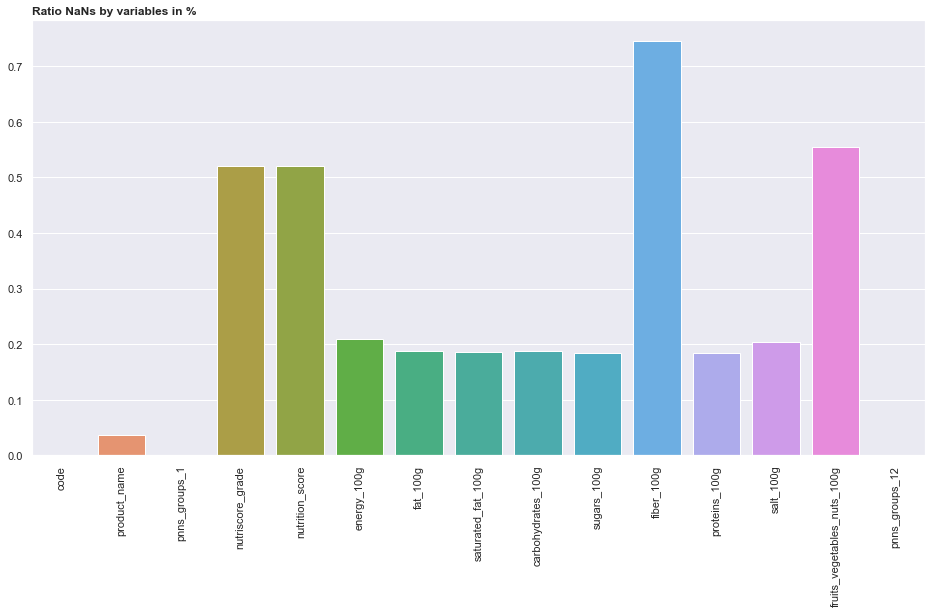

In [105]:
# Visualising NaNs
plt.figure(figsize = (16,8))
sns.barplot(x=data.iloc[:,:].isna().mean().index, y = data.iloc[:,:].isna().mean())
plt.xticks(rotation = 90)
plt.title('Ratio NaNs by variables in %', fontweight = 'bold', loc = 'left', fontsize=12)
plt.show()

# <a name="C13">Values to zero</a>

In [106]:
# Displaying nutritional variables other than main ones
for col in COL_SUPP:
    COL_AUTRE_NUTS.remove(col)
data[COL_AUTRE_NUTS].describe()

,saturated_fat_100g,sugars_100g,fiber_100g,salt_100g,fruits_vegetables_nuts_100g
count,457408.000000,458473.000000,143336.000000,448104.000000,250091.000000
mean,5.340882,13.853709,3.010230,1.237068,12.404755
std,7.994224,20.053660,5.081123,4.561572,26.014023
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.700000,0.100000,0.050000,0.000000
50%,2.000000,3.600000,1.700000,0.500000,0.000000
75%,7.800000,20.000000,3.672500,1.300000,9.300000
max,100.000000,100.000000,100.000000,100.000000,100.000000


In [107]:
# Assigning value of 0 to NaN in non main nutritional variables
for column in COL_AUTRE_NUTS:
    data[column].fillna(0, inplace=True)

In [108]:
# Displaying nutritional variables other than main ones
data[COL_AUTRE_NUTS].describe()

,saturated_fat_100g,sugars_100g,fiber_100g,salt_100g,fruits_vegetables_nuts_100g
count,562410.000000,562410.000000,562410.000000,562410.000000,562410.000000
mean,4.343739,11.293454,0.767188,0.985643,5.516114
std,7.503824,18.887656,2.881100,4.102033,18.409894
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.900000,1.900000,0.000000,0.150000,0.000000
75%,5.600000,13.000000,0.000000,1.010000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000


# <a name="C14">Average values by category</a>

In [109]:
# Assigning average value by pnns category to NaN in main nutritional variables
data_avant = data.copy()
data.pnns_groups_1.unique().tolist()
data['pnns_groups_1'].fillna("unknown", inplace=True)
CAT = data.pnns_groups_1.unique().tolist()
for column1 in COL_PRINC_NUTS:
    for column2 in CAT:
        mean = data[data['pnns_groups_1'] == column2][column1].mean()
        data[column1].fillna(mean, inplace=True)  
data_apres = data.copy()

<Figure size 2880x5760 with 0 Axes>

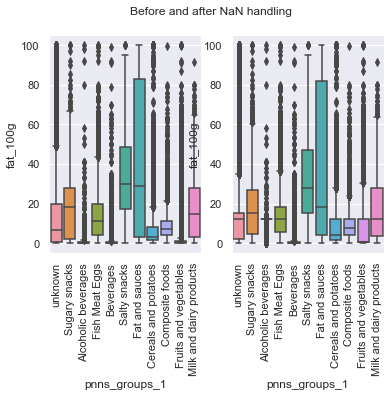

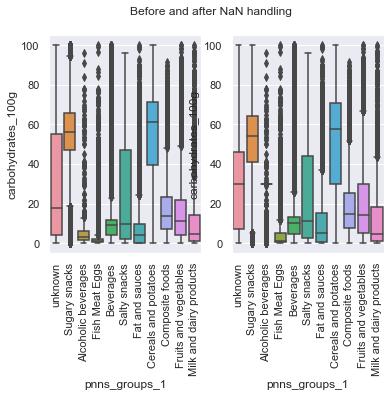

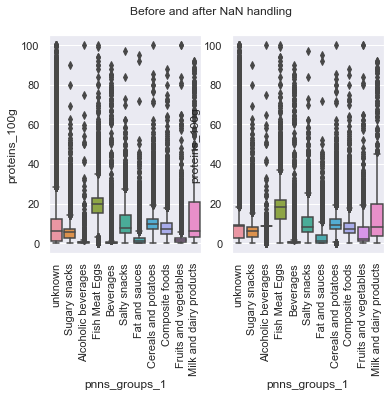

In [110]:
# Visualising using boxplots per category values of main nutritional variables - before and after NaN handling
plt.figure(figsize = (40,80))

for n in COL_PRINC_NUTS:
        plt.figure(n)
        plt.subplot(1, 2, 1)
        plt.suptitle("Before NaN handling",fontsize=12)
        sns.boxplot(x='pnns_groups_1', y=n, data=data_avant);
        plt.xticks(rotation = 90)

for m in COL_PRINC_NUTS:
        plt.figure(m)
        plt.subplot(1, 2, 2)
        plt.suptitle("Before and after NaN handling",fontsize=12)
        sns.boxplot(x='pnns_groups_1', y=m, data=data_apres);
        plt.xticks(rotation = 90)
plt.show()

# <a name="C15">Computed values with maths</a>

In [111]:
# Computing energy from the information of others - fats, proteins and carbohydrates - better informed.
# Computing (research) = data['fat_100g']*37+data['carbohydrates_100g']*17+data['proteins_100g']*17

In [112]:
# Displaying % NaN in variable energy
data[variable_princ_ener].isna().mean()

0.20866805355523552

In [113]:
# Computing energy in kJ from the math formula above
data.loc[:,'energy_cal_100g'] = data.loc[:,'fat_100g']*37 +data.loc[:,'carbohydrates_100g']*17 +data.loc[:,'proteins_100g']*17
data['energy_cal_100g'] = np.where(data['energy_cal_100g'].between(0,3500), data['energy_cal_100g'], np.nan)

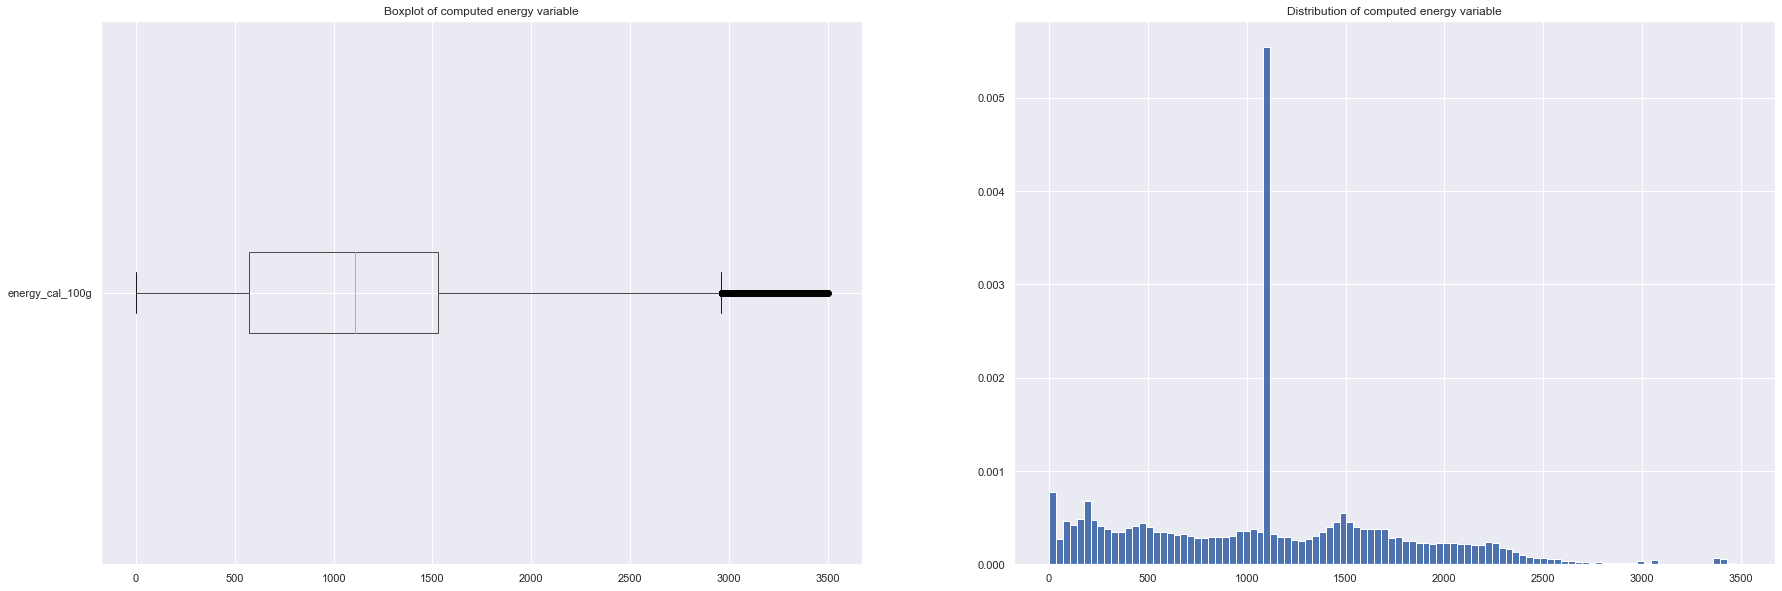

In [114]:
# Visualising computed energy
plt.figure(figsize = (30,10))

plt.subplot(1, 2, 1)
plt.title("Boxplot of computed energy variable", fontsize=12)
data.boxplot(column='energy_cal_100g', vert=False)

plt.subplot(1, 2, 2)
plt.title("Distribution of computed energy variable", fontsize=12)
data['energy_cal_100g'].hist(density=True, bins=100)

plt.show()

In [115]:
# Computing the energy supplied in kJ from the formula above for the values not entered
data_avant = data.copy()
mask = data[variable_princ_ener].isna()
data[variable_princ_ener] = np.where(mask, data[variable_princ_ener], data['energy_cal_100g'])
data = data.drop('energy_cal_100g',axis=1)
data_apres = data.copy()

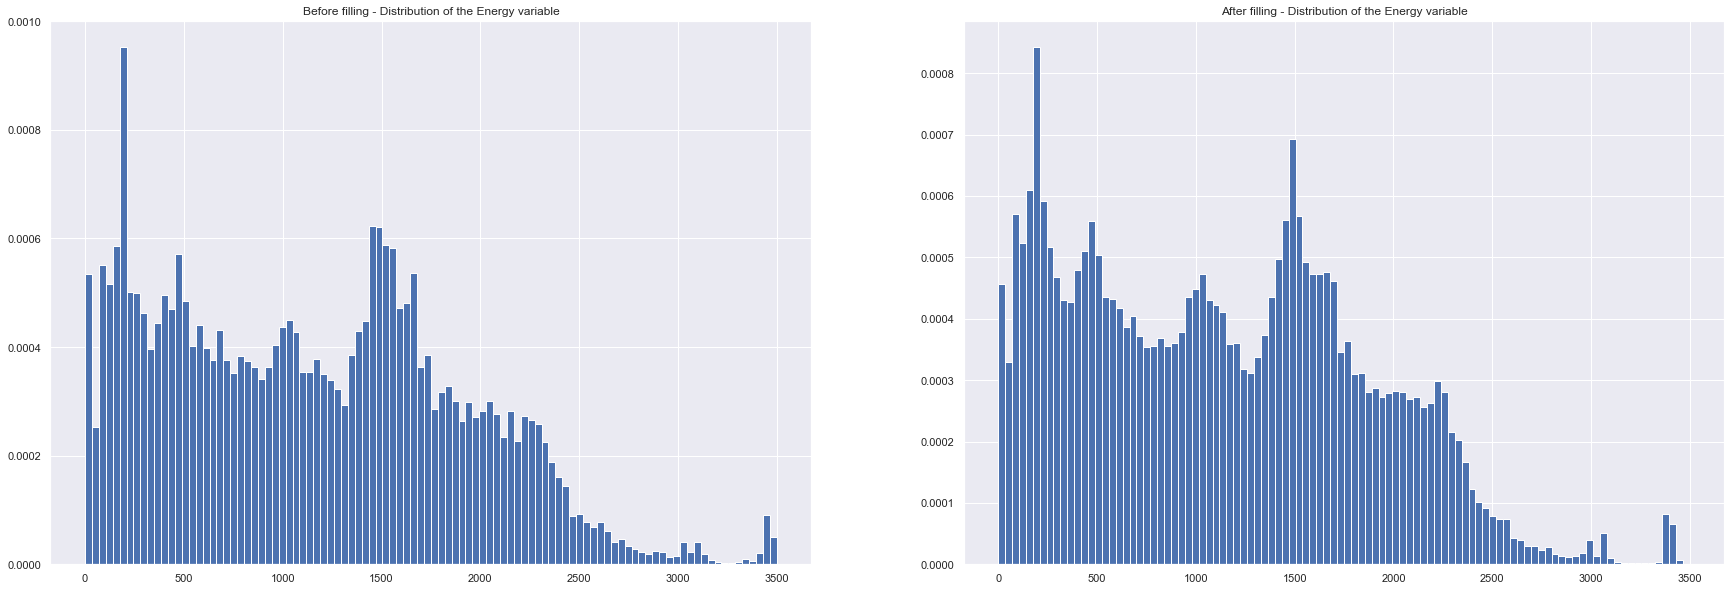

In [116]:
# Comparing energy before and after treatment - histogram
plt.figure(figsize = (30,10))

plt.subplot(1, 2, 1)
plt.title("Before filling - Distribution of the Energy variable", fontsize=12)
data_avant[variable_princ_ener].hist(density=True, bins=100)

plt.subplot(1, 2, 2)
plt.title("After filling - Distribution of the Energy variable", fontsize=12)
data_apres[variable_princ_ener].hist(density=True, bins=100)

plt.show()

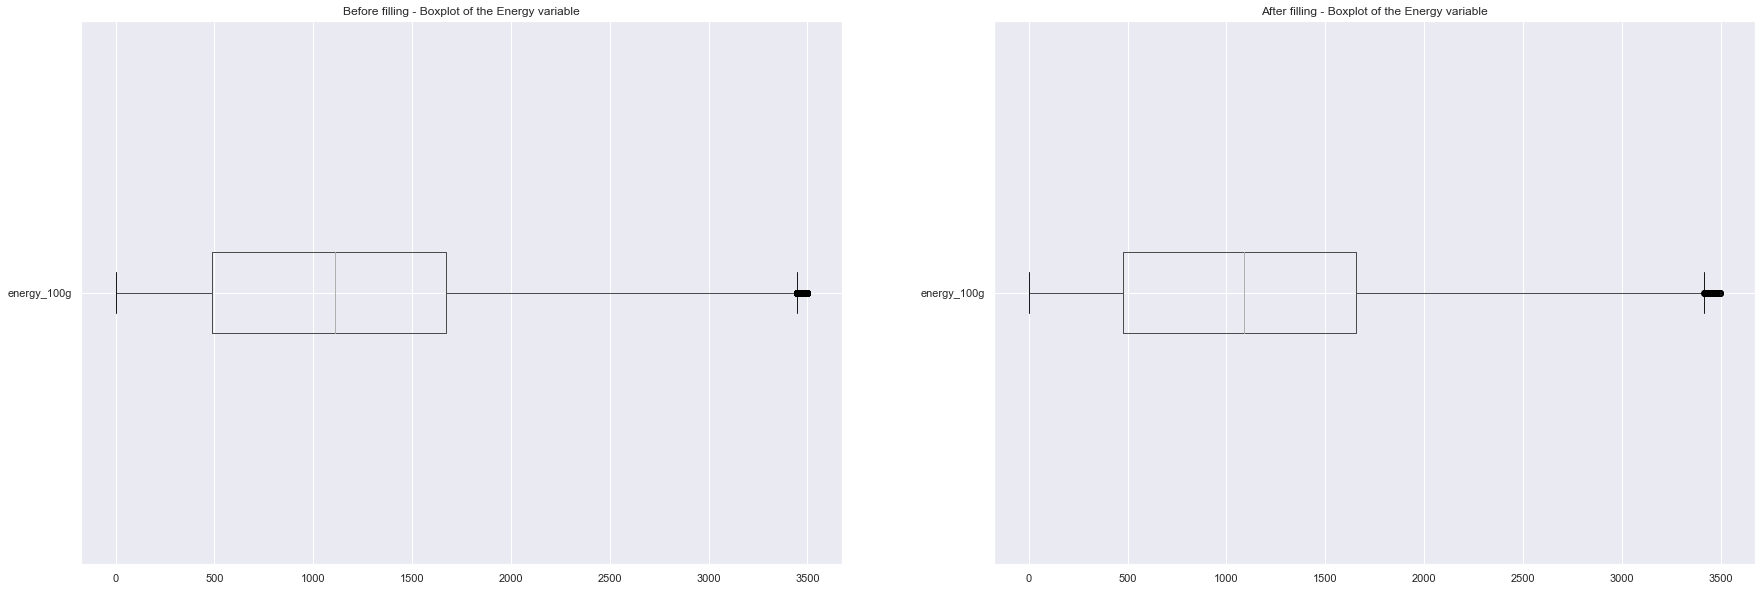

In [117]:
# Comparing energy before and after treatment - boxplot
plt.figure(figsize = (30,10))

plt.subplot(1, 2, 1)
plt.title("Before filling - Boxplot of the Energy variable", fontsize=12)
data_avant.boxplot(column=variable_princ_ener, vert=False)

plt.subplot(1, 2, 2)
plt.title("After filling - Boxplot of the Energy variable", fontsize=12)
data_apres.boxplot(column=variable_princ_ener, vert=False)

plt.show()

In [118]:
# % NaN of energy variable after filling
data[variable_princ_ener].isna().mean()

0.20897565832755463

# <a name="C16">Imputed values by classification and backward fill</a>

In [119]:
# The nutriscore takes a value between -15 and 40, which seems consistent with the possible values. No outliers.
# The nutrigrade has 5 letters - a; b;c; d and e. Coherent as well.
# However, these two variables have a lot of missing values. Let's try to extrapolate the value of nutrigrade from the other variables.

In [120]:
# Sorting data in the context of the nutriscore calculation method. Nutrients more and nutrients less.
data = data.sort_values(by=['energy_100g','sugars_100g','saturated_fat_100g','salt_100g','proteins_100g','fruits_vegetables_nuts_100g','fiber_100g'], ascending = [True, True, True, True, False, False, False], na_position='first')

In [121]:
# % NaN of nutriscore variable
data['nutrition_score'].isna().mean()

0.5208886755214167

In [122]:
# Filling the nutriscore with backward filling method after the classification of nutritions.
data_avant = data.copy()
data['nutrition_score'].fillna(method='bfill', inplace=True, limit=20)
data_apres = data.copy()

In [123]:
# % NaN of nutriscore variable after filling
data['nutrition_score'].isna().mean()

0.18189043580306183

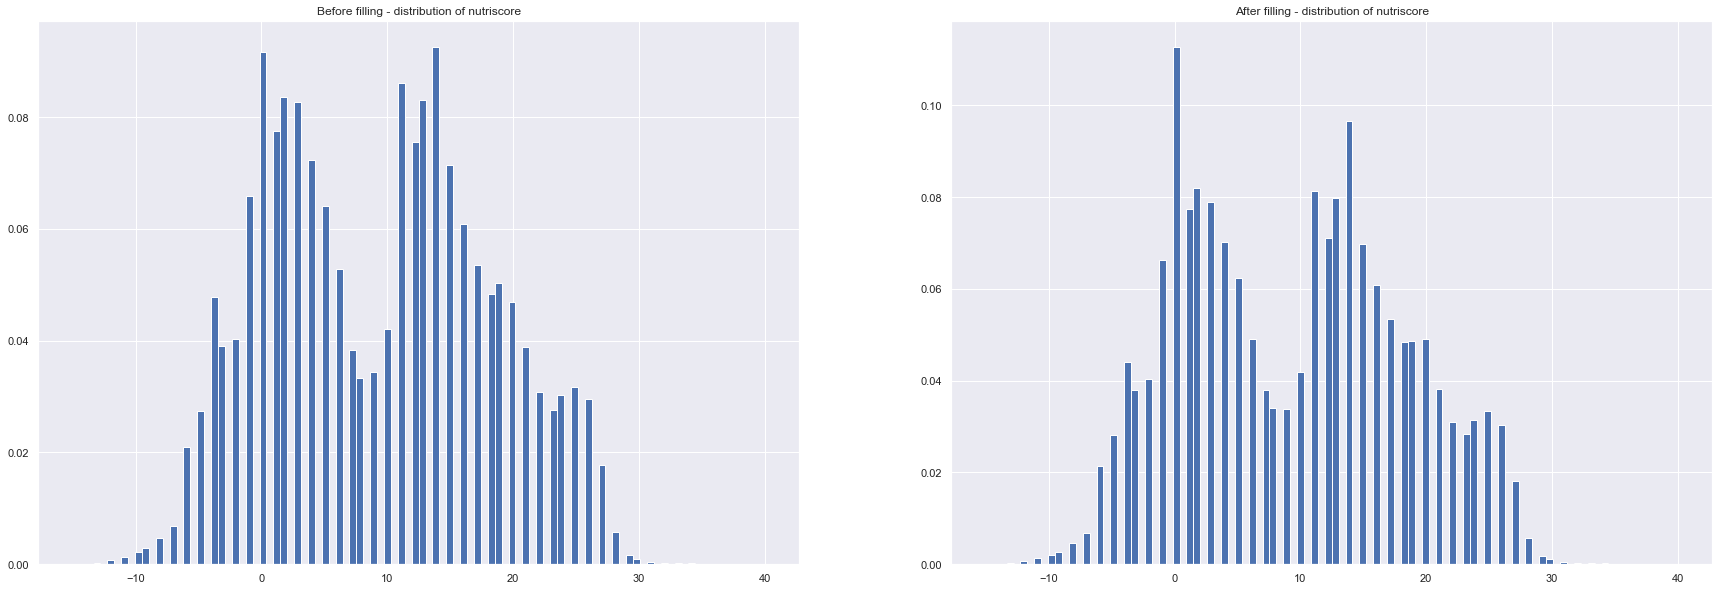

In [124]:
# Comparing nutriscore before and after treatment - histogram
plt.figure(figsize = (30,10))

plt.subplot(1, 2, 1)
plt.title("Before filling - distribution of nutriscore", fontsize=12)
data_avant['nutrition_score'].hist(density=True, bins=100)

plt.subplot(1, 2, 2)
plt.title("After filling - distribution of nutriscore", fontsize=12)
data_apres['nutrition_score'].hist(density=True, bins=100)

plt.show()

Text(0.5, 1.0, 'Boxplot nutrigrade by nutriscore')

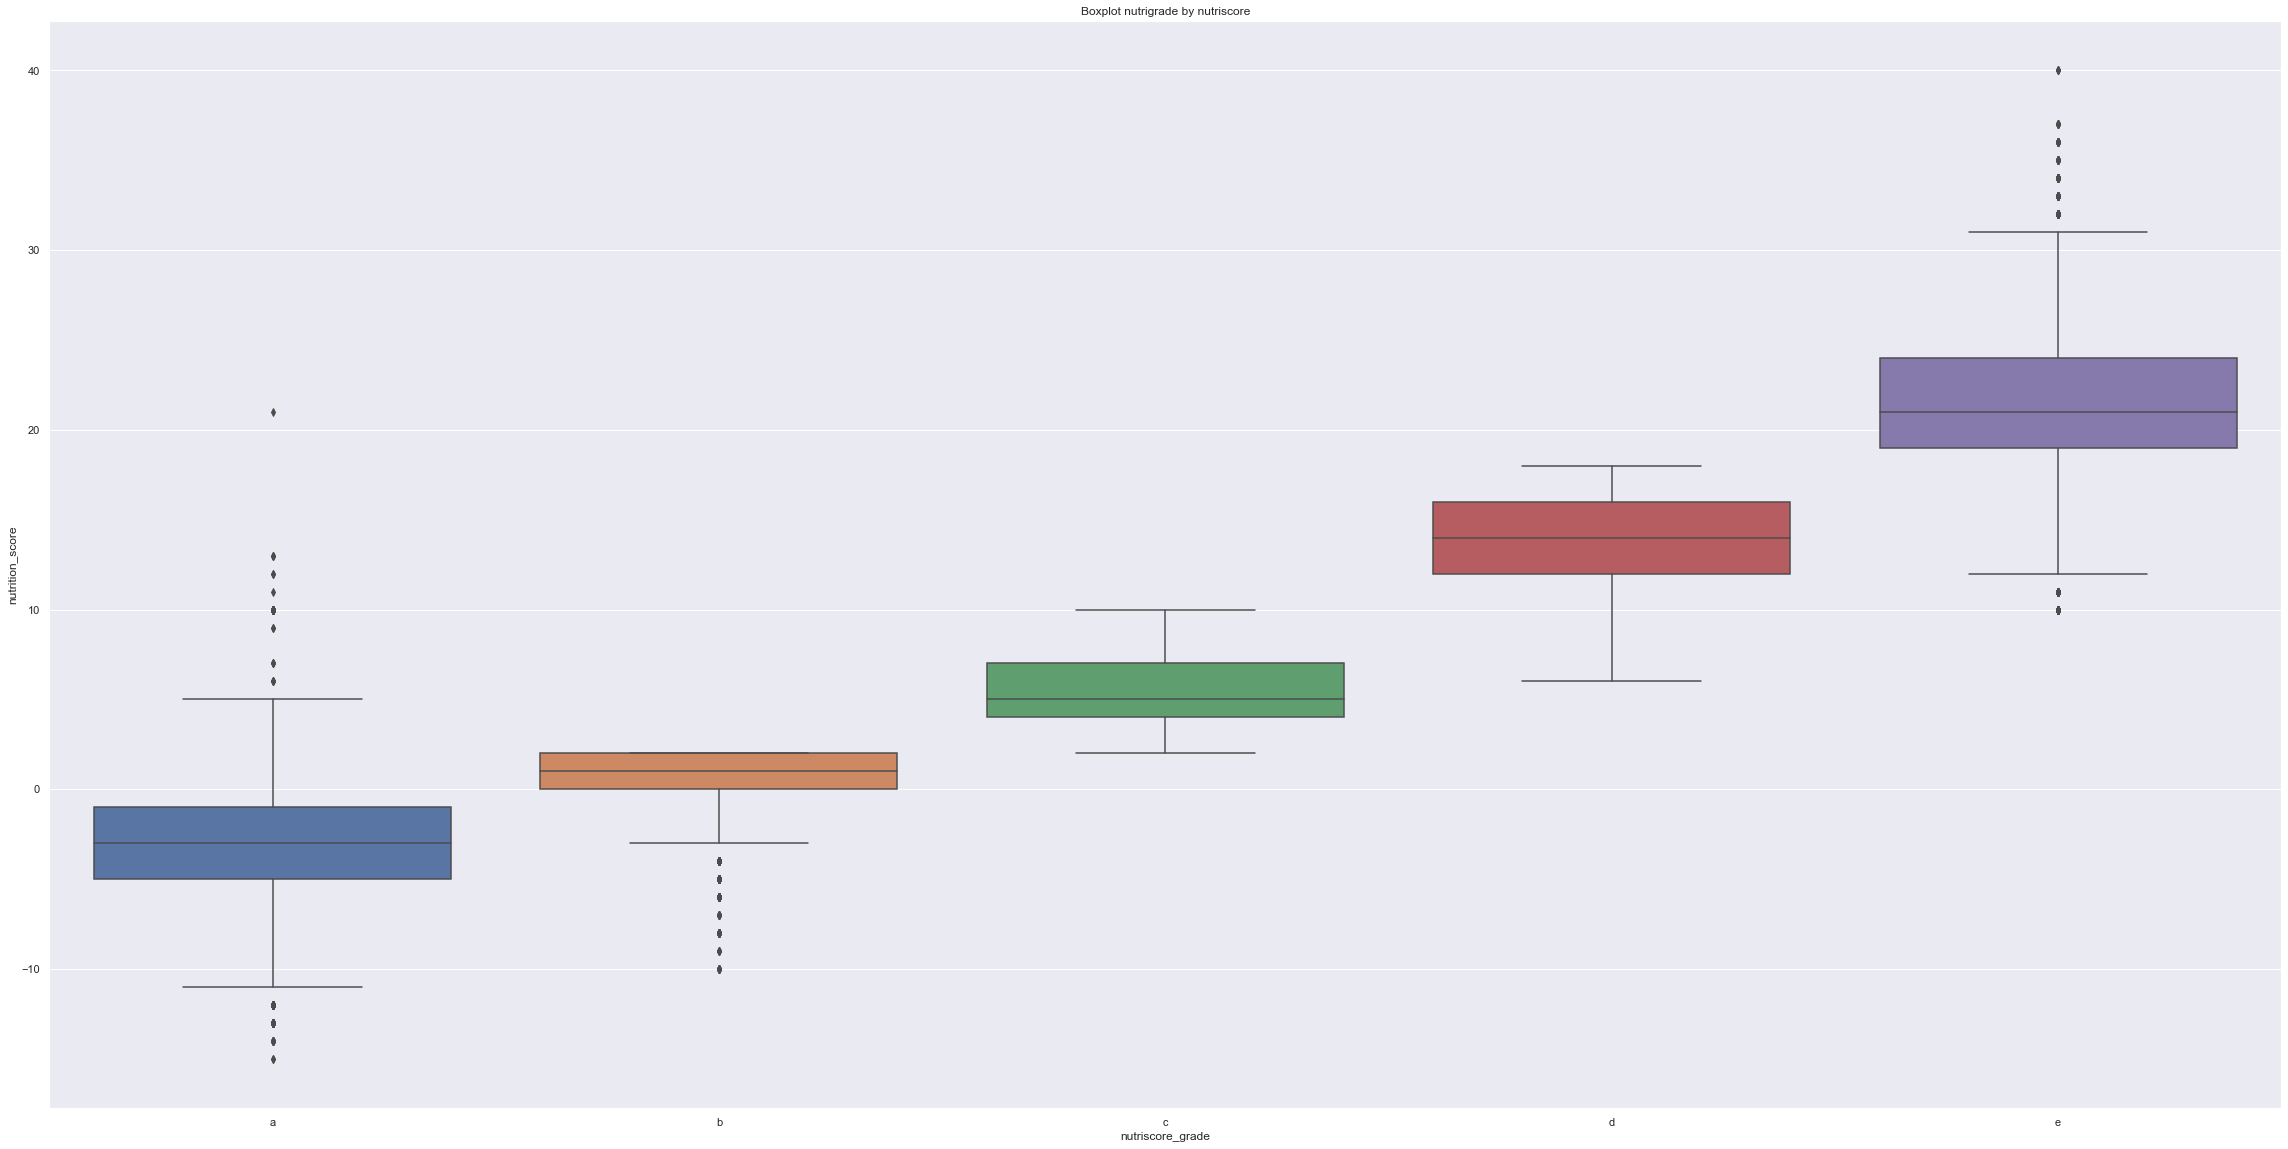

In [125]:
# Checking if nutrigrade can be deducted from nutriscore based on completed data
plt.figure(figsize = (40,20))
order = ["a", "b", "c", "d", "e"]
sns.boxplot(x='nutriscore_grade', y='nutrition_score', data=data, order=order);
plt.title("Boxplot nutrigrade by nutriscore", fontsize=12)

In [126]:
# Filling nutrigrade with backward filling method after the classification of nutritions.
data_avant = data.copy()
data['nutriscore_grade'].fillna(method='bfill', inplace=True, limit=20)
data_apres = data.copy()

In [127]:
# Comparing filling before and after
print("%NaN before : ", data_avant['nutriscore_grade'].isna().mean())
print("%NaN after : " , data_apres['nutriscore_grade'].isna().mean())

%NaN before :  0.52089400970822
%NaN after :  0.18189043580306183


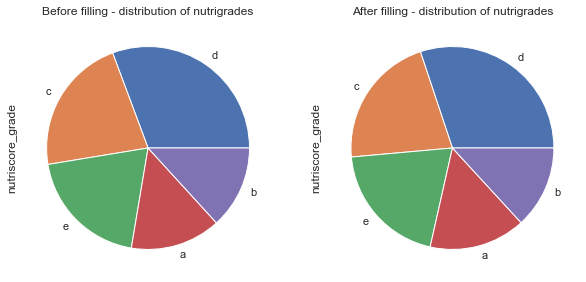

In [128]:
# Visualising variable nutrigrade - before and after filling
plt.figure(figsize = (10,10))

plt.subplot(1, 2, 1)
plt.title("Before filling - distribution of nutrigrades", fontsize=12)
data_avant['nutriscore_grade'].value_counts(normalize=True).plot(kind='pie')

plt.subplot(1, 2, 2)
plt.title("After filling - distribution of nutrigrades", fontsize=12)
data_apres['nutriscore_grade'].value_counts(normalize=True).plot(kind='pie')

plt.show()

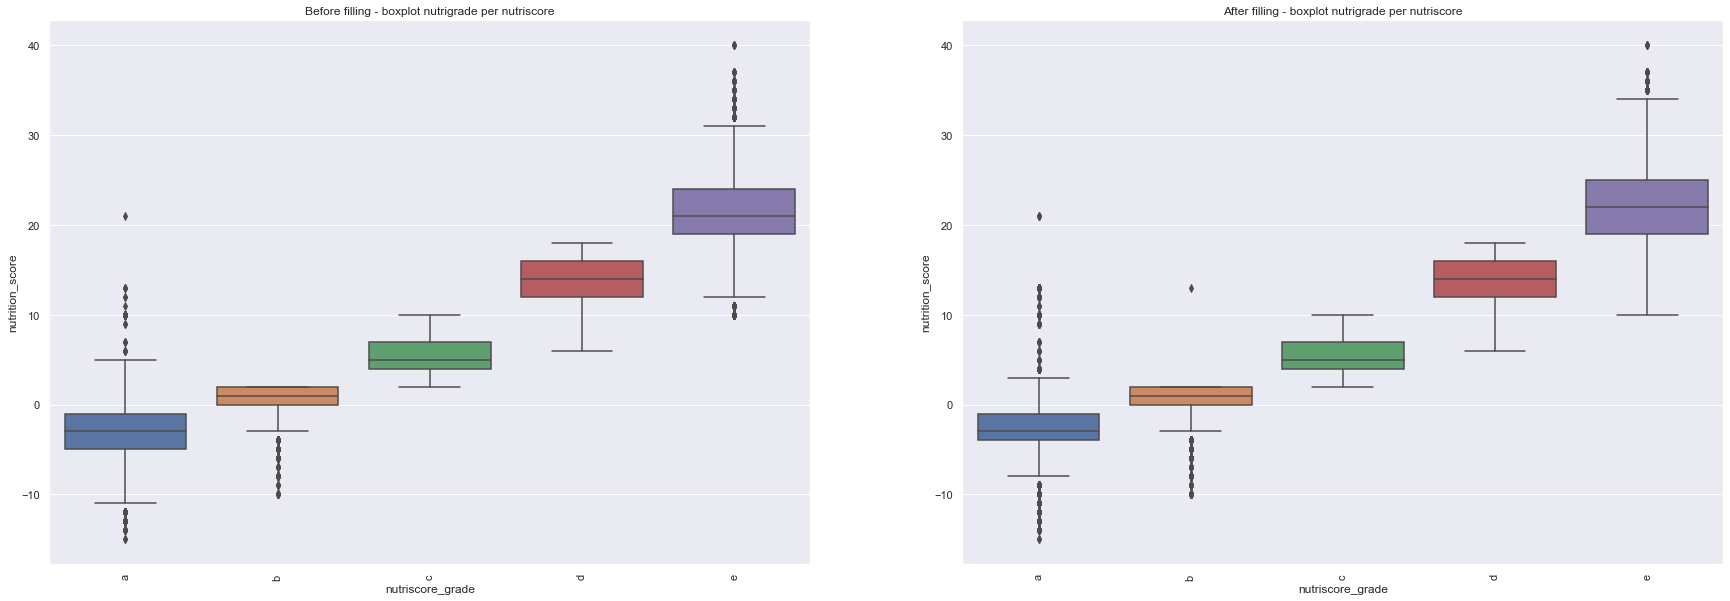

In [129]:
# Visualising variable nutrigrade/nutriscore - before and after filling
plt.figure(figsize = (30,10))

plt.subplot(1, 2, 1)
plt.title("Before filling - boxplot nutrigrade per nutriscore", fontsize=12)
data_avant['nutriscore_grade'].value_counts()
order = ["a", "b", "c", "d", "e"]
sns.boxplot(x='nutriscore_grade', y='nutrition_score', data=data_avant, order=order);
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
plt.title("After filling - boxplot nutrigrade per nutriscore", fontsize=12)
data_apres['nutriscore_grade'].value_counts()
order = ["a", "b", "c", "d", "e"]
sns.boxplot(x='nutriscore_grade', y='nutrition_score', data=data_apres, order=order);
plt.xticks(rotation = 90)

plt.show()


In [130]:
# Displaying file characteristics
analyse_data(data)

Shape :  (562410, 15)
% NaNs :  0.04059434694736343


In [131]:
# Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562410 entries, 977078 to 1529659
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         562410 non-null  object 
 1   product_name                 542074 non-null  object 
 2   pnns_groups_1                562410 non-null  object 
 3   nutriscore_grade             460113 non-null  object 
 4   nutrition_score              460113 non-null  float64
 5   energy_100g                  444880 non-null  float64
 6   fat_100g                     562410 non-null  float64
 7   saturated_fat_100g           562410 non-null  float64
 8   carbohydrates_100g           562410 non-null  float64
 9   sugars_100g                  562410 non-null  float64
 10  fiber_100g                   562410 non-null  float64
 11  proteins_100g                562410 non-null  float64
 12  salt_100g                    562410 non-null  float6

In [132]:
# % NaN after all cleaning operations
data.isna().mean()

code                           0.000000
product_name                   0.036159
pnns_groups_1                  0.000000
nutriscore_grade               0.181890
nutrition_score                0.181890
energy_100g                    0.208976
fat_100g                       0.000000
saturated_fat_100g             0.000000
carbohydrates_100g             0.000000
sugars_100g                    0.000000
fiber_100g                     0.000000
proteins_100g                  0.000000
salt_100g                      0.000000
fruits_vegetables_nuts_100g    0.000000
pnns_groups_12                 0.000000
dtype: float64

In [133]:
# Copying after this last step of cleaning
data.to_csv('en.openfoodfacts.org.products_nettoye.csv', index=False)

In [134]:
# Analysing cleaned file
analyse_data(data)

Shape :  (562410, 15)
% NaNs :  0.04059434694736343


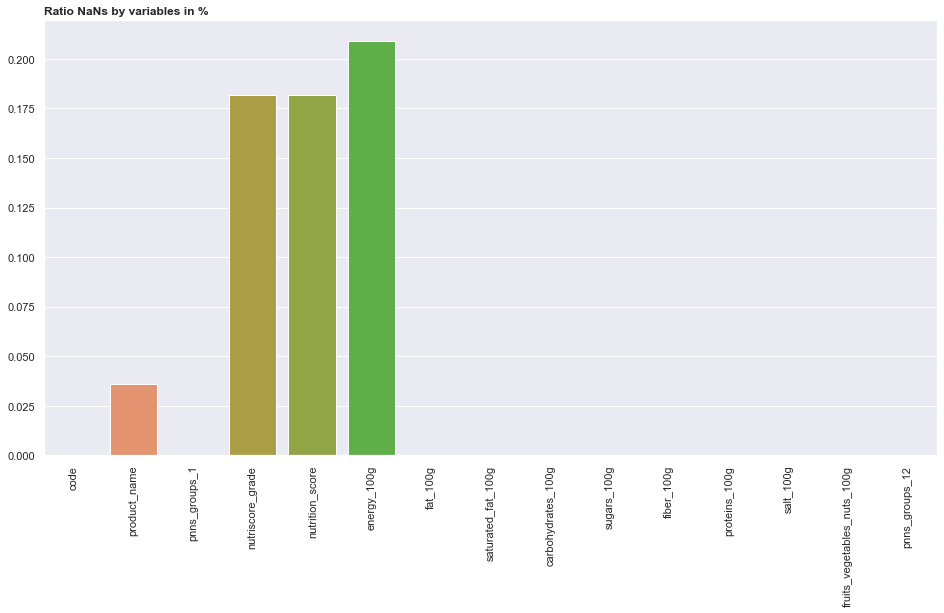

In [135]:
# Visualising missing data
plt.figure(figsize = (16,8))
sns.barplot(x=data.iloc[:,:].isna().mean().index, y = data.iloc[:,:].isna().mean())
plt.xticks(rotation = 90)
plt.title('Ratio NaNs by variables in %', fontweight = 'bold', loc = 'left', fontsize=12)
plt.show()

The end of Nettoyage